Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

1.1 Read the data and do exploratory data analysis (3 pts). Describe the data briefly. Interpret the inferences for each (3 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [3]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('bank_marketing_part1_Data.csv')

In [5]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [6]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  210 
no. of columns:  7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [10]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [11]:
# Check for duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [12]:
#univariate analysis
def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 Distribution of spending
----------------------------------------------------------------------------


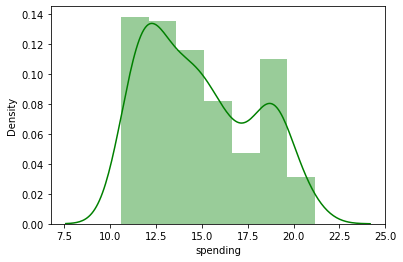

BoxPlot of spending
----------------------------------------------------------------------------


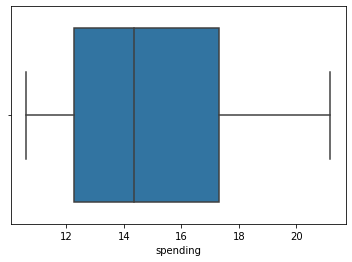

In [13]:
univariateAnalysis_numeric('spending')

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 Distribution of advance_payments
----------------------------------------------------------------------------


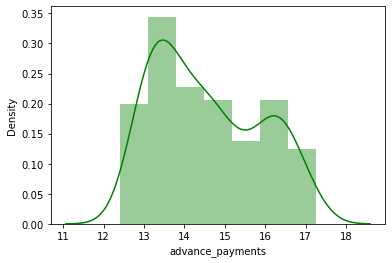

BoxPlot of advance_payments
----------------------------------------------------------------------------


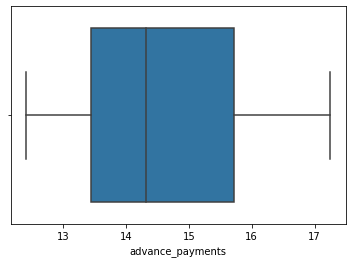

In [14]:
univariateAnalysis_numeric('advance_payments')

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 Distribution of probability_of_full_payment
----------------------------------------------------------------------------


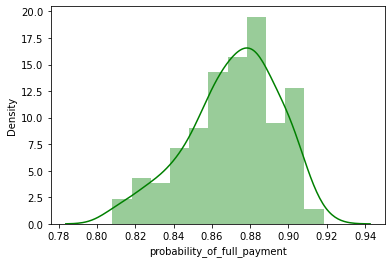

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


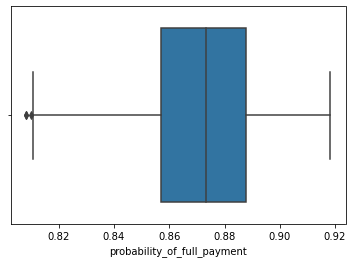

In [15]:
univariateAnalysis_numeric('probability_of_full_payment')

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 Distribution of current_balance
----------------------------------------------------------------------------


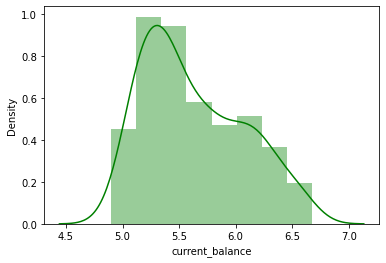

BoxPlot of current_balance
----------------------------------------------------------------------------


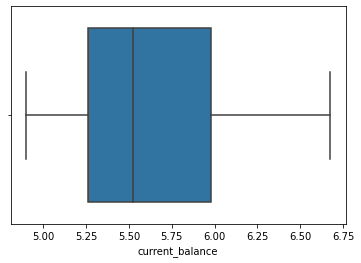

In [16]:
univariateAnalysis_numeric('current_balance')

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 Distribution of credit_limit
----------------------------------------------------------------------------


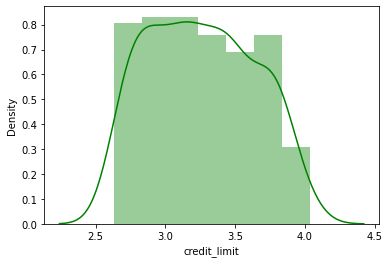

BoxPlot of credit_limit
----------------------------------------------------------------------------


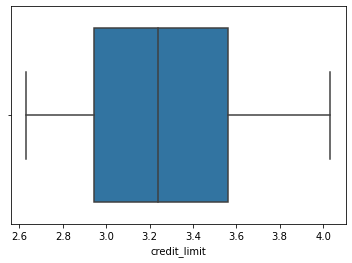

In [17]:
univariateAnalysis_numeric('credit_limit')

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 Distribution of min_payment_amt
----------------------------------------------------------------------------


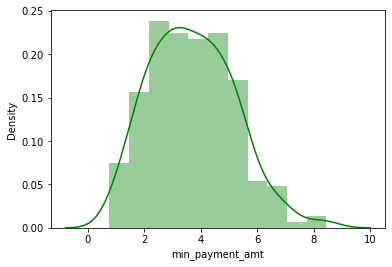

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


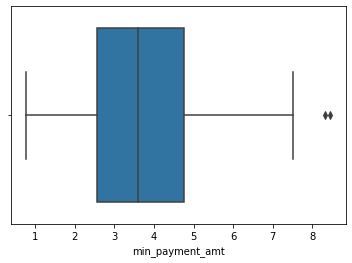

In [18]:
univariateAnalysis_numeric('min_payment_amt')

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


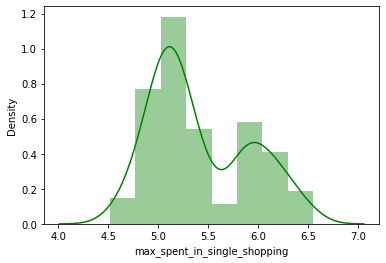

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


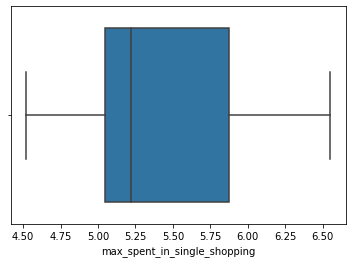

In [19]:
univariateAnalysis_numeric('max_spent_in_single_shopping')

In [20]:
# Let's check the skewness values quantitatively
df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

<AxesSubplot:>

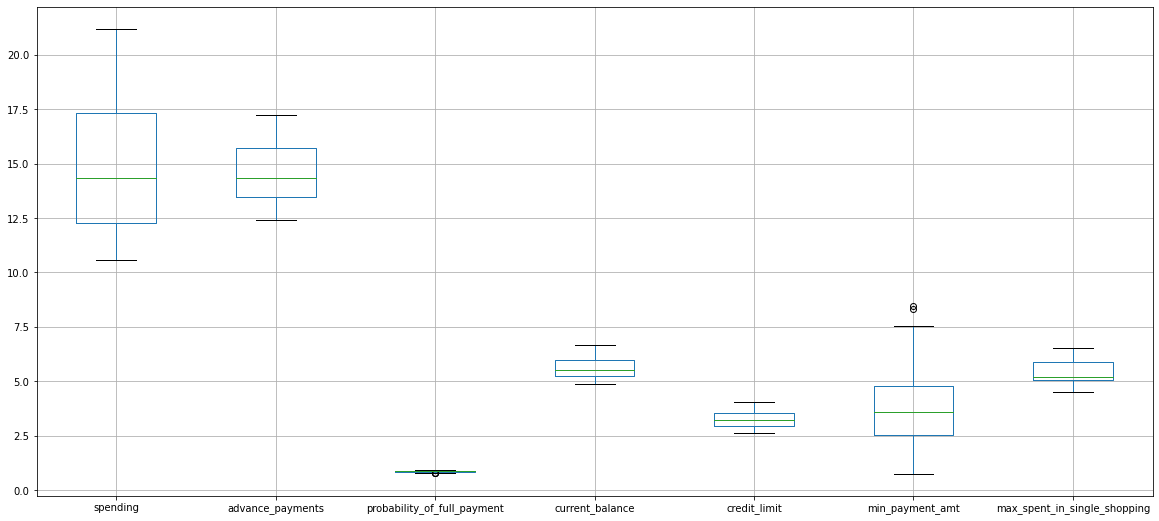

In [22]:
#checking for outliers and treating
plt.figure(figsize=(20,9))
df.boxplot()

we can see very few amount of outliers in the column pprobablity of full payment and the in  the cloumn mmin payment amt
So we are goung to treat it

In [7]:
#treating outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [8]:
## Check the lower range and upper range for the variable 
lr,ur=remove_outlier(df['probability_of_full_payment'])
print("lower range",lr, "and upper range", ur)

lower range 0.8105875 and upper range 0.9340875


In [9]:
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']>ur,ur,df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lr,lr,df['probability_of_full_payment'])

<AxesSubplot:xlabel='probability_of_full_payment'>

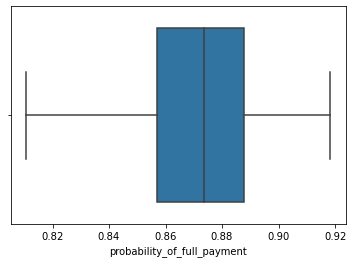

In [10]:
sns.boxplot(x=df.probability_of_full_payment)

In [11]:
## Check the lower range and upper range for the variable 
lr,ur=remove_outlier(df['min_payment_amt'])
print("lower range",lr, "and upper range", ur)

lower range -0.7493749999999992 and upper range 8.079625


In [12]:
df['min_payment_amt']=np.where(df['min_payment_amt']>ur,ur,df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']<lr,lr,df['min_payment_amt'])

<AxesSubplot:xlabel='min_payment_amt'>

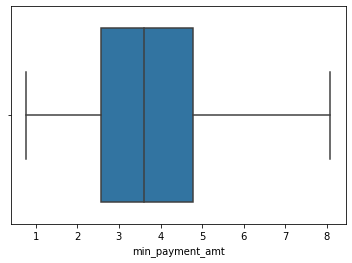

In [13]:
sns.boxplot(x=df.min_payment_amt)

Hence outliers are  treated

In [30]:
#Bi variate analysis(Using corr and heat map)
corr = df.corr()
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608900,0.949985,0.970771,-0.229619,0.863693
advance_payments,0.994341,1.000000,0.529925,0.972422,0.944829,-0.217051,0.890784
probability_of_full_payment,0.608900,0.529925,1.000000,0.368419,0.762218,-0.335071,0.227140
current_balance,0.949985,0.972422,0.368419,1.000000,0.860415,-0.170701,0.932806
credit_limit,0.970771,0.944829,0.762218,0.860415,1.000000,-0.258980,0.749131
min_payment_amt,-0.229619,-0.217051,-0.335071,-0.170701,-0.258980,1.000000,-0.009605
max_spent_in_single_shopping,0.863693,0.890784,0.227140,0.932806,0.749131,-0.009605,1.000000


<AxesSubplot:>

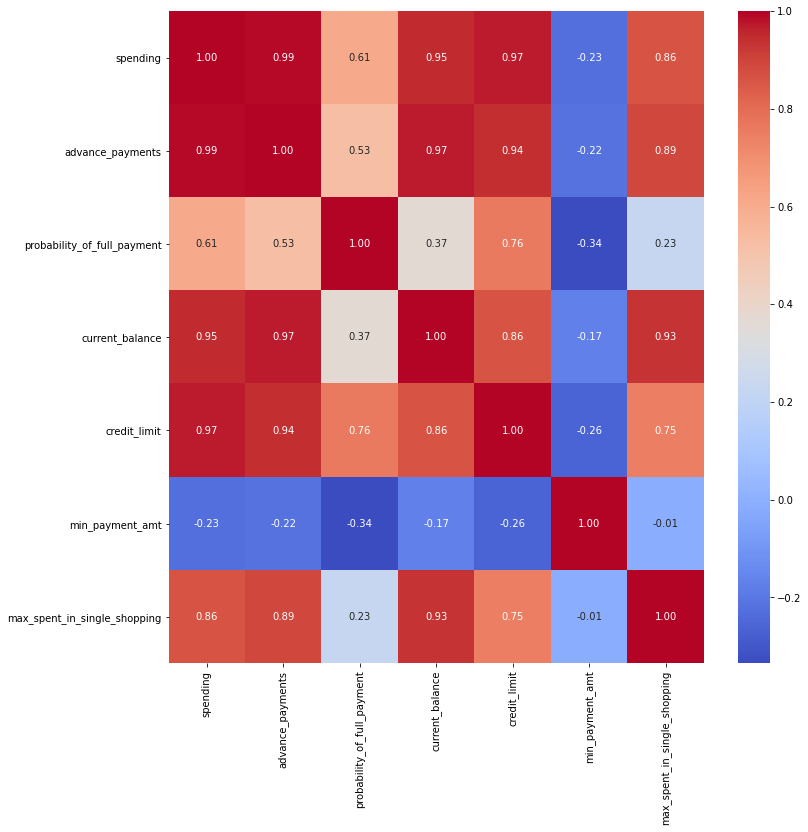

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt = '.2f', cmap='coolwarm')

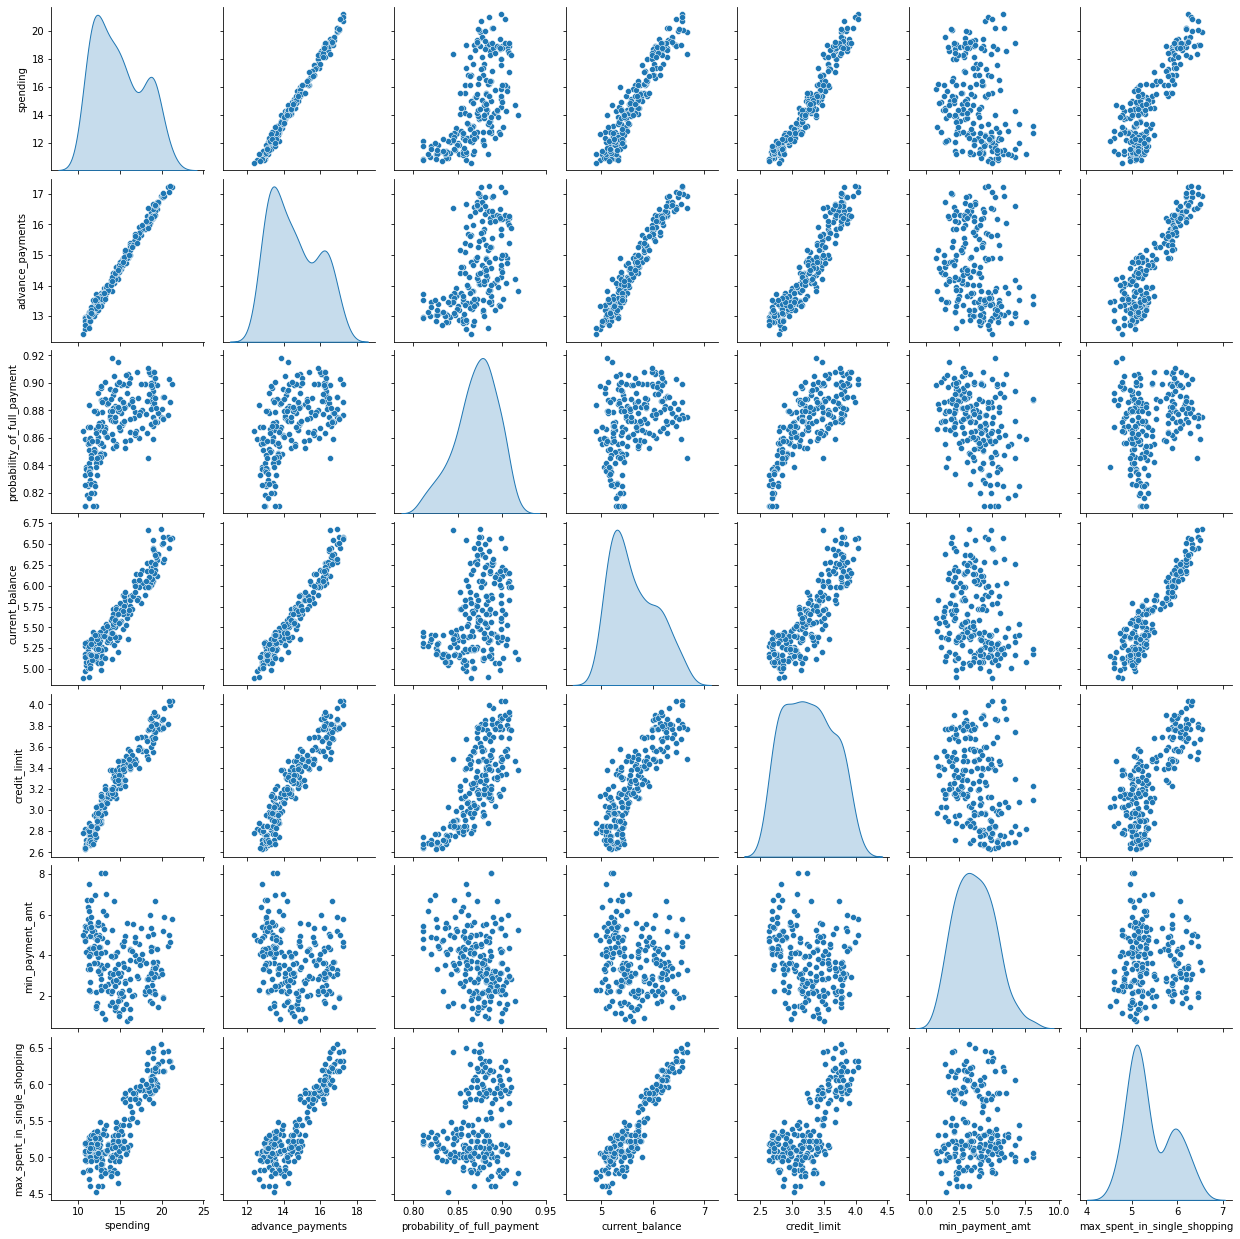

In [32]:
#Multi variate analysis
sns.pairplot(df,diag_kind='kde')

<AxesSubplot:>

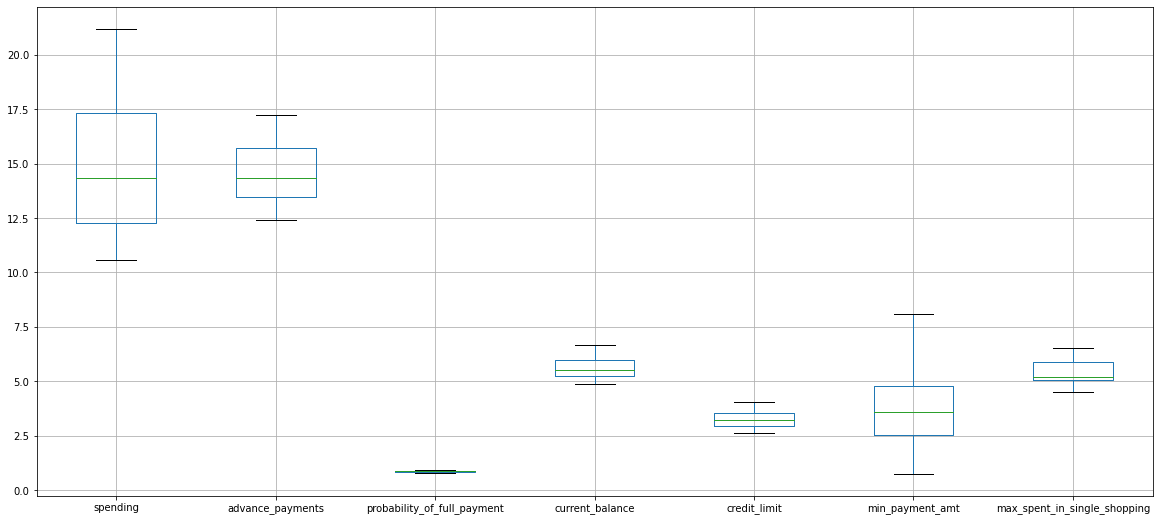

In [14]:
#checking after outlier treatment
plt.figure(figsize=(20,9))
df.boxplot()

1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.

In [34]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.871025,5.628533,3.258605,3.697288,5.408071
std,2.909699,1.305959,0.023560,0.443063,0.377714,1.494689,0.491480
min,10.590000,12.410000,0.810588,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.079625,6.550000


scaling is necessary for this data set because we can see the differnt columns has different range of values and weightage

In [15]:
#applying zscore for scaling the data
from scipy.stats import zscore
df_scaled=df.apply(zscore)
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


1.3 Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.

In [18]:
#importing libraries for clustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [19]:
#using ward linkage method
wardlink=linkage(df_scaled,method='ward')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [32.5, 32.5, 60.0, 60.0],
  [10.0, 10.0, 46.25, 46.25],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [132.5, 132.5, 170.0, 170.0],
  [91.25, 91.25, 151.25, 151.25],
  [28.125, 28.125, 121.25, 121.25],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [202.5, 202.5, 232.5, 232.5],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [280.0, 280.0, 300.0, 300.0],
  [260.0, 260.0, 290.0, 290.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [275.0, 275.0, 322.5, 322.5],
  [217.5, 217.5, 298.75,

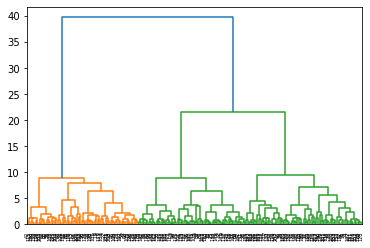

In [20]:
dendrogram(wardlink)

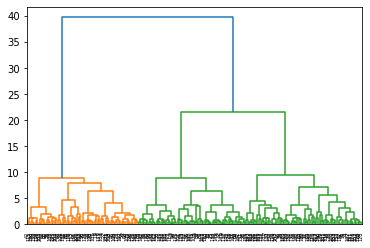

In [22]:
dend=dendrogram(wardlink)

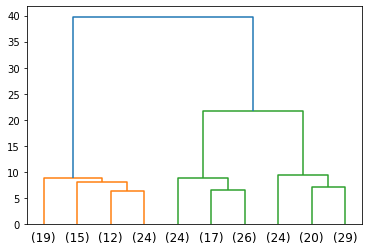

In [23]:
dend=dendrogram(wardlink,truncate_mode='lastp',p=10)

In [24]:
#To obtain the cluster or the product that belong to each cluster (forming the cluster)

In [25]:
from scipy.cluster.hierarchy import fcluster

In [26]:
#method 1 (by giving the t value)
cluster=fcluster(wardlink,3,criterion='maxclust')
# 3 is the t value that determines the number of clusters to be considered

In [27]:
cluster

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [28]:
#method 2(Distance method. Specifing the cut off line distance in the y axis to determine the number of cluster)
clusters=fcluster(wardlink,15,criterion='distance')
clusters
#23 is the distance in the y axis in above clustering graph

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [29]:
#To attach the culster in the main dataframe as a new column

In [30]:
df['Hierarchical Clusters']=clusters

In [31]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Hierarchical Clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [32]:
df['Hierarchical Clusters'].value_counts()

3    73
1    70
2    67
Name: Hierarchical Clusters, dtype: int64

To analyse and get insights for cluster

In [33]:
g=df.groupby('Hierarchical Clusters').mean()
g

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Hierarchical Clusters,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178


In [34]:
g['Frequency']=df['Hierarchical Clusters'].value_counts().sort_index()
g

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Frequency
Hierarchical Clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


<AxesSubplot:xlabel='Hierarchical Clusters', ylabel='spending'>

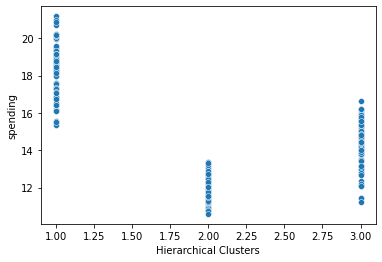

In [49]:
sns.scatterplot(df['Hierarchical Clusters'],df['spending'])


<AxesSubplot:xlabel='Hierarchical Clusters', ylabel='advance_payments'>

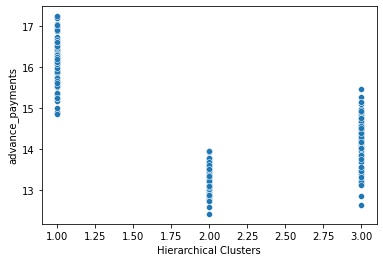

In [53]:
sns.scatterplot(df['Hierarchical Clusters'],df['advance_payments'])

<AxesSubplot:xlabel='Hierarchical Clusters', ylabel='probability_of_full_payment'>

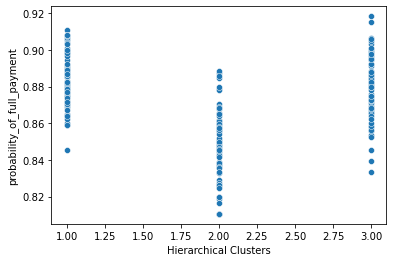

In [54]:
sns.scatterplot(df['Hierarchical Clusters'],df['probability_of_full_payment'])

<AxesSubplot:xlabel='Hierarchical Clusters', ylabel='current_balance'>

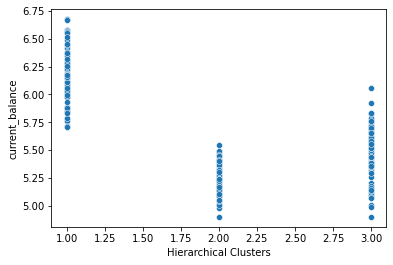

In [55]:
sns.scatterplot(df['Hierarchical Clusters'],df['current_balance'])

<AxesSubplot:xlabel='Hierarchical Clusters', ylabel='credit_limit'>

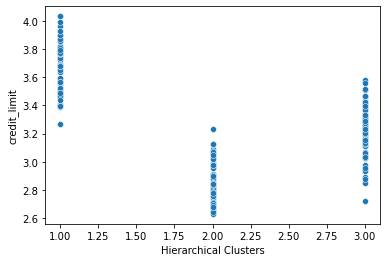

In [56]:
sns.scatterplot(df['Hierarchical Clusters'],df['credit_limit'])

<AxesSubplot:xlabel='Hierarchical Clusters', ylabel='min_payment_amt'>

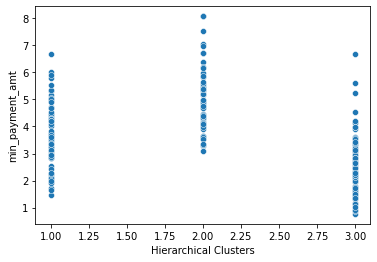

In [57]:
sns.scatterplot(df['Hierarchical Clusters'],df['min_payment_amt'])

<AxesSubplot:xlabel='Hierarchical Clusters', ylabel='max_spent_in_single_shopping'>

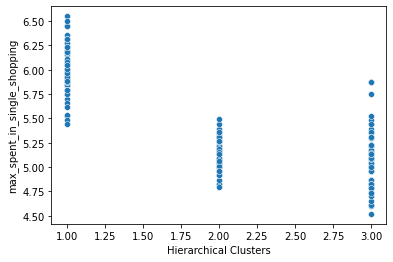

In [58]:
sns.scatterplot(df['Hierarchical Clusters'],df['max_spent_in_single_shopping'])

<AxesSubplot:xlabel='Hierarchical Clusters', ylabel='spending'>

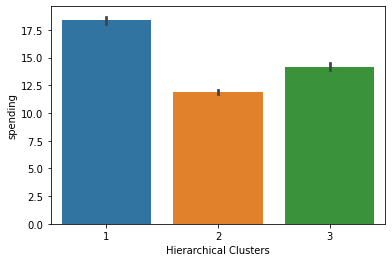

In [80]:
#to visualize the customer seggregarion
sns.barplot(df['Hierarchical Clusters'],df['spending'])

<AxesSubplot:xlabel='Hierarchical Clusters', ylabel='advance_payments'>

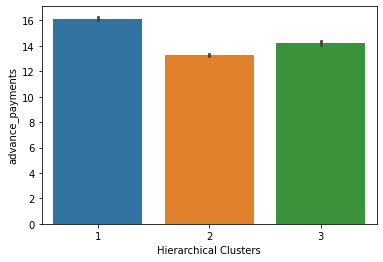

In [81]:
sns.barplot(df['Hierarchical Clusters'],df['advance_payments'])

<AxesSubplot:xlabel='Hierarchical Clusters', ylabel='probability_of_full_payment'>

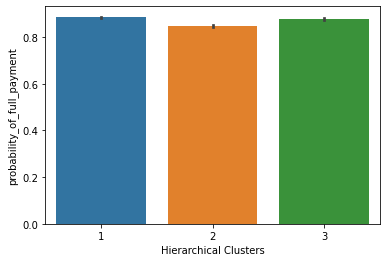

In [82]:
sns.barplot(df['Hierarchical Clusters'],df['probability_of_full_payment'])

<AxesSubplot:xlabel='Hierarchical Clusters', ylabel='current_balance'>

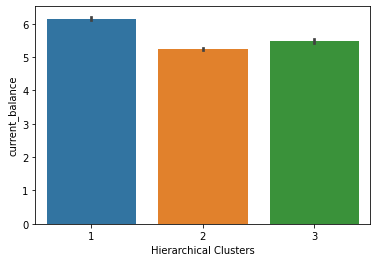

In [83]:
sns.barplot(df['Hierarchical Clusters'],df['current_balance'])

<AxesSubplot:xlabel='Hierarchical Clusters', ylabel='credit_limit'>

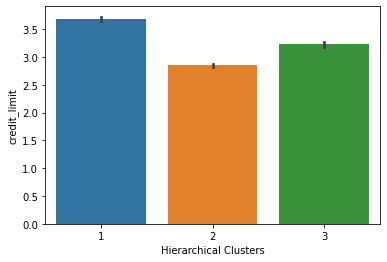

In [84]:
sns.barplot(df['Hierarchical Clusters'],df['credit_limit'])

<AxesSubplot:xlabel='Hierarchical Clusters', ylabel='min_payment_amt'>

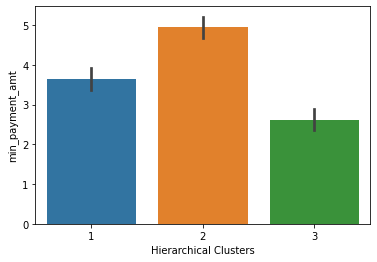

In [85]:
sns.barplot(df['Hierarchical Clusters'],df['min_payment_amt'])


<AxesSubplot:xlabel='Hierarchical Clusters', ylabel='max_spent_in_single_shopping'>

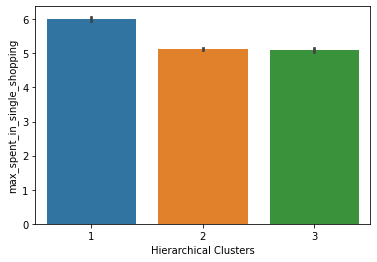

In [86]:
sns.barplot(df['Hierarchical Clusters'],df['max_spent_in_single_shopping'])


In [61]:
#for more iinsights
import dtale
dtale.show(df)

In [58]:
#Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

In [59]:
Acluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [60]:
Acluster_agg=Acluster.fit_predict(df_scaled)
print(Acluster_agg)

[1 0 1 2 1 2 2 0 1 2 1 0 2 1 0 2 0 2 0 2 2 2 1 2 0 1 0 2 2 2 0 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 0 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 0 0 1 1 2 0 1 0 2 2 1 1 1 2 1 2 1 0 1 0 1 1 2 2 1 0
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 0 2 1 2
 0 2 0 2 0 0 0 0 0 2 0 1 1 2 1 1 1 2 1 0 0 0 0 2 0 1 1 1 0 0 1 2 0 0 0 0 1
 1 0 0 0 2 0 0 2 1 0 1 1 2 1 2 0 1 0 2 1 0 1 0 1 0]


In [61]:
df['Agglomerative cluster']=Acluster_agg

In [62]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Hierarchical Clusters,Agglomerative cluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1


In [63]:
df['Agglomerative cluster'].value_counts()

0    73
1    70
2    67
Name: Agglomerative cluster, dtype: int64

In [64]:
#from above  both way of hirarchical clustering method gives the same results

1.4 Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). Apply elbow curve and silhouette score (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Silhouette Score must be calculated for the same values of K taken above and commented on. Report must contain logical and correct explanations for choosing the optimum clusters using both elbow method and silhouette scores. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.

In [62]:
from sklearn.cluster import KMeans  #Important library for KMeans

In [63]:
#applying Kmeans clustering
k_means=KMeans(n_clusters=2,random_state=1)    #initially consider the numer of cluster as 2
#random state parameter is given to get the same output when it is runned any time.So incllude in all below KMeans command 

In [64]:
k_means.fit(df_scaled)

KMeans(n_clusters=2, random_state=1)

In [65]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [66]:
k_means.inertia_

659.14740095485

In [67]:
#One  of the way to  check the  number of  cluster  to be determined is as follows

In [68]:
k_means=KMeans(n_clusters=1)
k_means.fit(df_scaled)
k_means.inertia_

1469.999999999999

In [69]:
k_means=KMeans(n_clusters=2)
k_means.fit(df_scaled)
k_means.inertia_

659.14740095485

In [70]:
k_means=KMeans(n_clusters=3)
k_means.fit(df_scaled)
k_means.inertia_

430.298481751223

In [71]:
k_means=KMeans(n_clusters=4)
k_means.fit(df_scaled)
k_means.inertia_

370.86859623942047

In [72]:
k_means=KMeans(n_clusters=5)
k_means.fit(df_scaled)
k_means.inertia_

325.788587641923

In [ ]:
# so if  we observe the above code we can see the considerable drop upto first three cluster. So we can consider 3 cluster.
# To confirm it with wss plot

In [73]:
wss=[]  # creating the empty array in the  name  wss

In [74]:
#creating the for loop  and appent the  inertia values in wss array
for i in range(1,11):  # 1 to 11 indicates the inertia of first 10 clusters
    KM=KMeans(n_clusters=i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [75]:
wss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 370.8605175832009,
 325.788587641923,
 290.00750305055453,
 262.7461264759799,
 240.27033353986693,
 222.33875610499035,
 207.49704717124624]

In [76]:
#so from the above code we got the inertial value of 10 clusters which can be plotted and the drop of each cluster can be 
# identified. So that we can determine the number of clusters

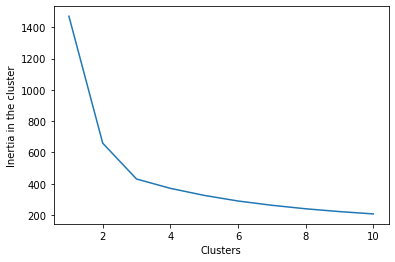

In [77]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [78]:
# from the above plot  we can see that the drop is significant till the 3. So we can consider 3 number  of clusters.

In [88]:
k_means=KMeans(n_clusters=3)
k_means.fit(df_scaled)
labels=k_means.labels_

In [89]:
labels

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [90]:
df['KMeans  Clusters']=labels

In [91]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Hierarchical Clusters,KMeans Clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0


In [92]:
#To verify weather the observations are mapped to corret cluster silhoutte width and score is identified

In [93]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [94]:
silhouette_score(df_scaled,labels)

0.4008059221522216

In [95]:
#AS WE SEE THE SILHOUTTE score is positive we can infer that oobservation are mappped correctly to the cluster
#to further confirm wwe can find the silhoutte width of each observation

In [96]:
sil_width=silhouette_samples(df_scaled,labels)
sil_width

array([0.5732776 , 0.36556355, 0.63709249, 0.515595  , 0.36097201,
       0.22152508, 0.47529542, 0.36025848, 0.51938329, 0.53443903,
       0.46599399, 0.12839864, 0.39177784, 0.52379458, 0.11202082,
       0.22512083, 0.33760956, 0.5018087 , 0.03635503, 0.23801566,
       0.36177434, 0.3693663 , 0.43153403, 0.26364196, 0.47484293,
       0.06663956, 0.27151643, 0.50414367, 0.55487254, 0.43479958,
       0.37528473, 0.43006502, 0.39151526, 0.3943622 , 0.5362567 ,
       0.55717776, 0.50878421, 0.42617776, 0.50641159, 0.62170114,
       0.55929539, 0.48579454, 0.39864428, 0.61044051, 0.51398993,
       0.37791063, 0.30664315, 0.58154614, 0.48759463, 0.53302467,
       0.31693425, 0.49463828, 0.58531649, 0.59861082, 0.61892471,
       0.23370264, 0.44475373, 0.54060572, 0.57808265, 0.57623567,
       0.55297302, 0.51585343, 0.55579575, 0.27793624, 0.49524145,
       0.56405298, 0.57784591, 0.52274801, 0.6313322 , 0.08521853,
       0.44260057, 0.3237709 , 0.54096805, 0.5820664 , 0.29582

In [97]:
sil_width.min()

0.0027685411286160638

In [98]:
#as we see the  minimum vallue of the silhoutte width is positive value. So as there is no negateve value in the width the obsewrvation are mappped correctlu

In [99]:
#if we want we can add a cloumn of silhoutte width to the  main df

In [100]:
df['Sil_width']=sil_width

In [101]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Hierarchical Clusters,KMeans Clusters,Sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0,0.573278
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,2,0.365564
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0,0.637092
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,1,0.515595
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0,0.360972


In [102]:
df['KMeans  Clusters'].value_counts()

1    72
2    71
0    67
Name: KMeans  Clusters, dtype: int64

In [103]:
g1=df.groupby('KMeans  Clusters').mean()
g1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Hierarchical Clusters,Sil_width
KMeans Clusters,,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.468077
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,2.083333,0.399556
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,0.338593


In [105]:
g1.drop(['Hierarchical Clusters'],axis=1,inplace=True)

In [106]:
g1['Kmean Label_frequency']=df['KMeans  Clusters'].value_counts().sort_index()
g1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Sil_width,Kmean Label_frequency
KMeans Clusters,,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,0.468077,67
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,0.399556,72
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,0.338593,71


<AxesSubplot:xlabel='KMeans  Clusters', ylabel='spending'>

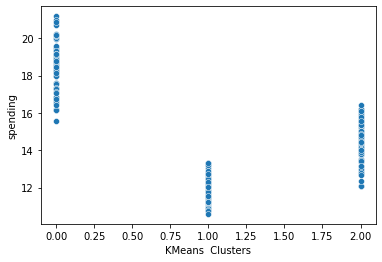

In [108]:
sns.scatterplot(df['KMeans  Clusters'],df['spending'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='spending'>

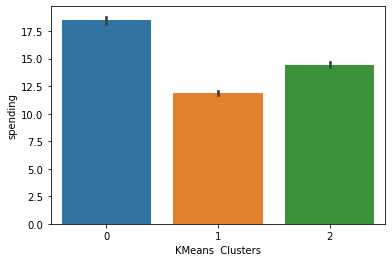

In [116]:
sns.barplot(df['KMeans  Clusters'],df['spending'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='advance_payments'>

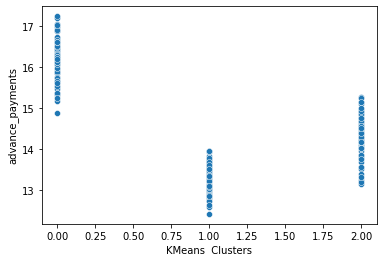

In [109]:
sns.scatterplot(df['KMeans  Clusters'],df['advance_payments'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='advance_payments'>

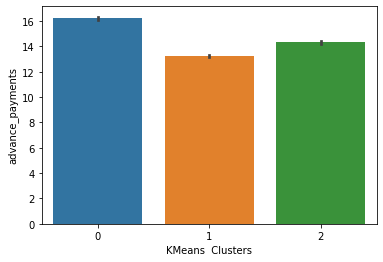

In [117]:
sns.barplot(df['KMeans  Clusters'],df['advance_payments'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='probability_of_full_payment'>

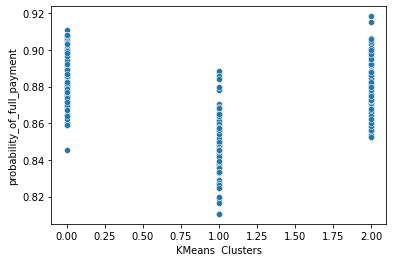

In [110]:
sns.scatterplot(df['KMeans  Clusters'],df['probability_of_full_payment'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='probability_of_full_payment'>

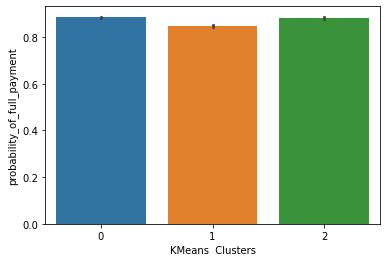

In [118]:
sns.barplot(df['KMeans  Clusters'],df['probability_of_full_payment'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='current_balance'>

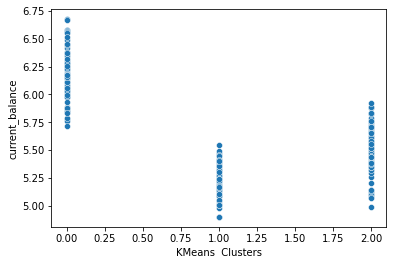

In [111]:
sns.scatterplot(df['KMeans  Clusters'],df['current_balance'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='current_balance'>

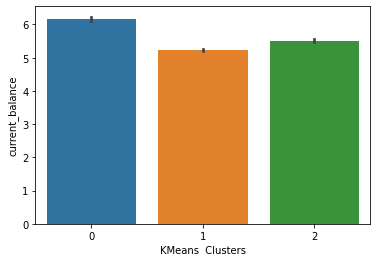

In [119]:
sns.barplot(df['KMeans  Clusters'],df['current_balance'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='credit_limit'>

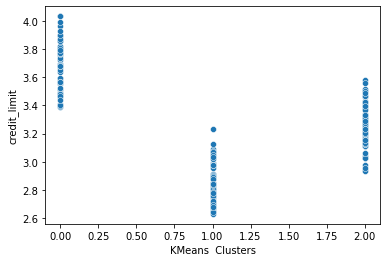

In [112]:
sns.scatterplot(df['KMeans  Clusters'],df['credit_limit'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='credit_limit'>

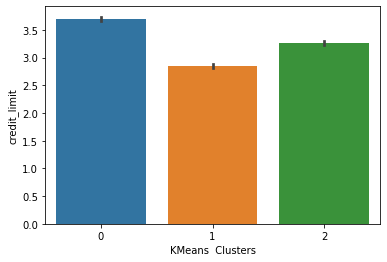

In [120]:
sns.barplot(df['KMeans  Clusters'],df['credit_limit'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='min_payment_amt'>

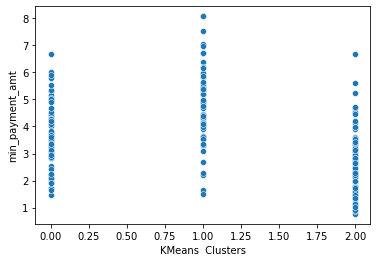

In [113]:
sns.scatterplot(df['KMeans  Clusters'],df['min_payment_amt'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='min_payment_amt'>

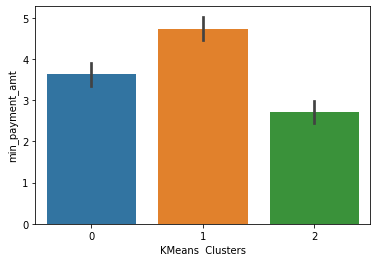

In [121]:
sns.barplot(df['KMeans  Clusters'],df['min_payment_amt'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='max_spent_in_single_shopping'>

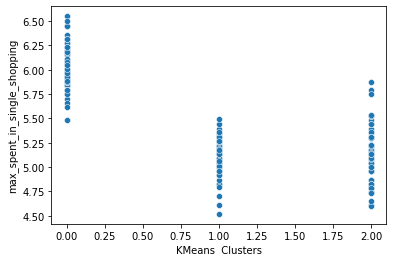

In [114]:
sns.scatterplot(df['KMeans  Clusters'],df['max_spent_in_single_shopping'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='max_spent_in_single_shopping'>

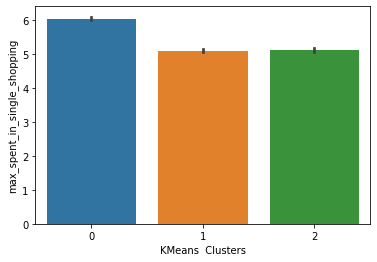

In [122]:
sns.barplot(df['KMeans  Clusters'],df['max_spent_in_single_shopping'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='Sil_width'>

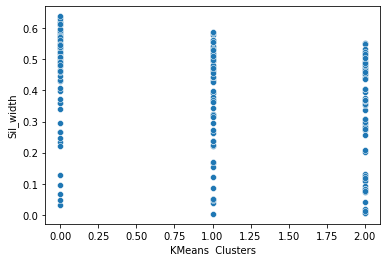

In [124]:
sns.scatterplot(df['KMeans  Clusters'],df['Sil_width'])

<AxesSubplot:xlabel='KMeans  Clusters', ylabel='Sil_width'>

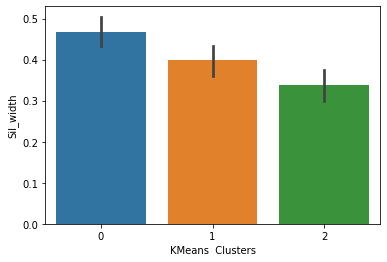

Executing shutdown due to inactivity...
Executing shutdown due to inactivity...
Executing shutdown due to inactivity...


2021-12-14 01:04:00,044 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...
Executing shutdown...
Executing shutdown...


2021-12-14 01:04:04,291 - INFO     - Executing shutdown...


In [125]:
sns.barplot(df['KMeans  Clusters'],df['Sil_width'])

In [123]:
#for more iinsights
import dtale
dtale.show(df)

1.5 Describe cluster profiles for the clusters defined (2.5 pts). Recommend different promotional strategies for different clusters in context to the business problem in-hand (2.5 pts ). After adding the final clusters to the original dataframe, do the cluster profiling. Divide the data in the finalyzed groups and check their means. Explain each of the group briefly. There should be at least 3-4 Recommendations. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks will only be allotted if the recommendations are correct and business specific. variable means. Students to explain the profiles and suggest a mechanism to approach each cluster. Any logical explanation is acceptable.

Include the groupby of two clustering method and pprovide sugessions and the insights

In [138]:
g.T

Hierarchical Clusters,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848155,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.940302,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Frequency,70.000000,67.000000,73.000000


In [139]:
g1.T

KMeans Clusters,0,1,2
spending,18.495373,11.856944,14.437887
advance_payments,16.203433,13.247778,14.337746
probability_of_full_payment,0.884210,0.848330,0.881597
current_balance,6.175687,5.231750,5.514577
credit_limit,3.697537,2.849542,3.259225
min_payment_amt,3.632373,4.733892,2.707341
max_spent_in_single_shopping,6.041701,5.101722,5.120803
Sil_width,0.468077,0.399556,0.338593
Kmean Label_frequency,67.000000,72.000000,71.000000


Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [126]:
data=pd.read_csv('insurance_part2_data.csv')

In [4]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
print("no. of rows: ",data.shape[0], "\n""no. of columns: ",data.shape[1])

no. of rows:  3000 
no. of columns:  10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [7]:
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [8]:
# Check for duplicate data
dups1 = data.duplicated()
print('Number of duplicate rows = %d' % (dups1.sum()))

Number of duplicate rows = 139


Even duplicate values are present, customers may be different, So duplicates are not dropped

In [9]:
data.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


Duration is negative which is a not possible

In [10]:
data['Duration'].min()

-1

In [11]:
data['Duration'].max()

4580

In [12]:
data['Duration'].unique()

array([   7,   34,    3,    4,   53,    8,   30,   16,   19,   42,  368,
         77,   23,   21,  366,    2,   40,   33,   66,   71,   25,   29,
         31,   36,   70,   11,   27,   32,   20,   90,   17,   14,    5,
         75,   35,   24,   22,  364,   13,   15,    6,   37,  365,   38,
         81,   96,   28,   44,   57,   51,   26,  367,   12,    9,  110,
         58,   65,  100,  186,   39,   48,   46,  266,   72,   61,   43,
         18,  146,   10,   59,   93,   56,   50,   99,  135,  382,   47,
         74,   64,  379,  152,  112,  380,  189,   60,   41,   89,   95,
        383,   62,  374,   55,  401,  145,   80,   83,    1,   52,  114,
         63,   49,   69,   67,  109,  105,   54,   98,  259,  239,  102,
        166,  165,  107,  385,   68,   73,  144,  126,  116,   45,  113,
        111,  378,   82,  187,  394,  147,   88,  175,   87,  402,  393,
        224,  384,  244,  148,  209,  132,  377,  235,   79,  101,  158,
        120,  376,  125,  386,  162,  375,   76,  1

Two wrong are found in the duration variable  -1 and 4580 Treating the duration anamolies

Two find the wrong data belong to which agency code

In [13]:
data[data['Duration'] == -1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [14]:
data[data['Duration'] == 4580]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA


so anamoly -1 belongs to JZI code

4580 belongs to C2b code

In [15]:
ana1=data[data['Agency_Code'] == 'JZI']

In [16]:
ana1.describe()

,Age,Commision,Duration,Sales
count,239.000000,239.000000,239.000000,239.000000
mean,42.485356,11.638703,41.481172,36.196109
std,11.758726,8.355118,57.150827,32.126616
min,18.000000,6.300000,-1.000000,0.000000
25%,35.000000,7.700000,9.000000,22.000000
50%,43.000000,9.100000,21.000000,26.000000
75%,50.000000,12.250000,53.000000,35.000000
max,75.000000,63.350000,385.000000,205.000000


In [17]:
data['Duration'] = data['Duration'].replace(-1,41)

In [18]:
ana2=data[data['Agency_Code'] == 'C2B']

In [19]:
ana2

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
10,37,C2B,Airlines,Yes,46.96,Online,368,187.85,Silver Plan,ASIA
11,43,C2B,Airlines,Yes,15.88,Online,77,63.50,Silver Plan,ASIA
13,52,C2B,Airlines,Yes,5.88,Online,7,23.50,Bronze Plan,ASIA
15,39,C2B,Airlines,Yes,54.00,Online,366,216.00,Silver Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2987,16,C2B,Airlines,Yes,15.00,Online,15,60.00,Bronze Plan,ASIA
2991,29,C2B,Airlines,Yes,48.30,Online,381,193.20,Silver Plan,ASIA
2994,27,C2B,Airlines,Yes,71.85,Online,416,287.40,Gold Plan,ASIA
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA


In [20]:
ana2.describe()

,Age,Commision,Duration,Sales
count,924.000000,924.000000,924.000000,924.000000
mean,37.765152,24.006169,119.404762,94.984632
std,12.440020,24.994934,210.082779,100.368351
min,11.000000,0.050000,0.000000,0.000000
25%,28.000000,6.000000,11.000000,23.000000
50%,34.500000,12.190000,29.000000,47.475000
75%,47.000000,44.892500,189.500000,181.250000
max,83.000000,134.750000,4580.000000,539.000000


In [21]:
data['Duration'] = data['Duration'].replace(4580,119)

In [22]:
data.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,68.528333,60.249913
std,10.463518,25.481455,105.760249,70.733954
min,8.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,27.000000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,466.000000,539.000000


Now we can observe the max and min value of duration are changed

In [23]:
data['Agency_Code'].value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

In [24]:
data['Type'].value_counts()

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

In [25]:
data['Claimed'].value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

In [26]:
data['Channel'].value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

In [27]:
data['Product Name'].value_counts()

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

In [28]:
data['Destination'].value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

Univariate analysis for continuous variables


In [29]:
#univariate analysis
def univariateAnalysis_numeric1(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(data[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(data[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=data[column])
    plt.show()

Description of Age
----------------------------------------------------------------------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


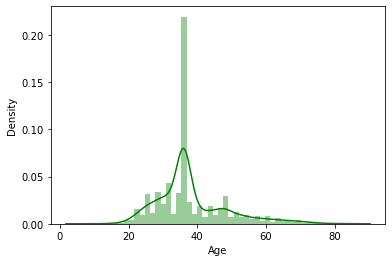

BoxPlot of Age
----------------------------------------------------------------------------


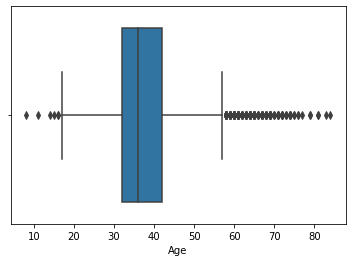

In [30]:
univariateAnalysis_numeric1('Age')

Description of Commision
----------------------------------------------------------------------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 Distribution of Commision
----------------------------------------------------------------------------


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


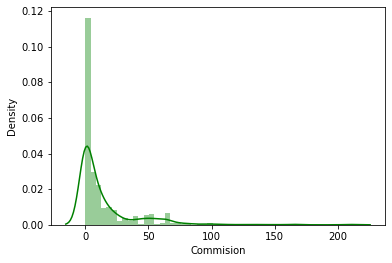

BoxPlot of Commision
----------------------------------------------------------------------------


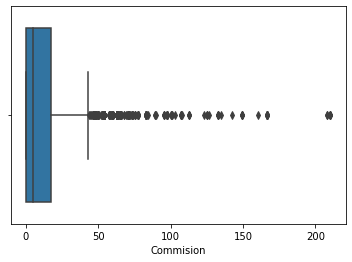

In [31]:
univariateAnalysis_numeric1('Commision')

Description of Duration
----------------------------------------------------------------------------
count    3000.000000
mean       68.528333
std       105.760249
min         0.000000
25%        11.000000
50%        27.000000
75%        63.000000
max       466.000000
Name: Duration, dtype: float64 Distribution of Duration
----------------------------------------------------------------------------


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


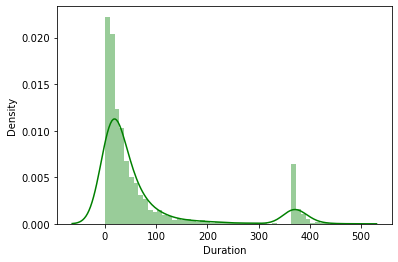

BoxPlot of Duration
----------------------------------------------------------------------------


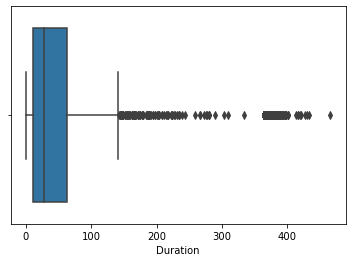

In [32]:
univariateAnalysis_numeric1('Duration')

Description of Sales
----------------------------------------------------------------------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 Distribution of Sales
----------------------------------------------------------------------------


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


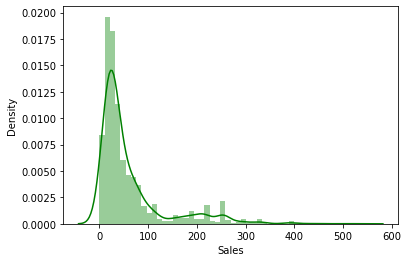

BoxPlot of Sales
----------------------------------------------------------------------------


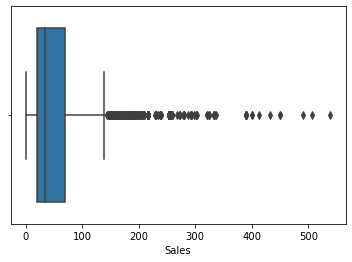

In [33]:
univariateAnalysis_numeric1('Sales')

Outliers are not treated.  An observation is considered to be an outlier if that particular has been mistakenly captured in the data set. Treating outliers sometimes results in the models having better performance but the models lose out on the generalization. So, a good way to approach this would be to build models with and without treating outliers and then report the results. On the other hand, it is perfectly fine if you are building your models only once i.e. either after treating or not treating the outliers. 

Scaling is also not done now and it is required only for ANN

Univariate analysis for categorical variables

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

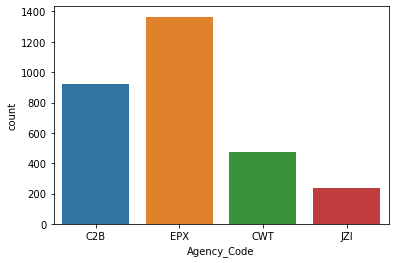

In [34]:
sns.countplot(data = data, x = 'Agency_Code')

<AxesSubplot:xlabel='Type', ylabel='count'>

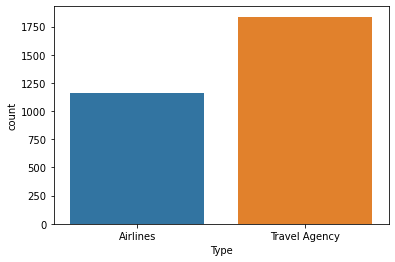

In [35]:
sns.countplot(data = data, x = 'Type')

<AxesSubplot:xlabel='Claimed', ylabel='count'>

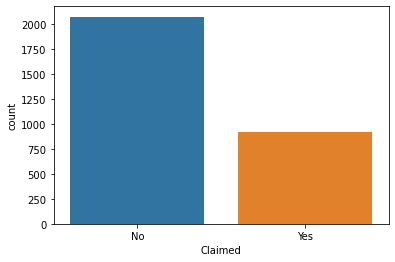

In [36]:
sns.countplot(data = data, x = 'Claimed')

<AxesSubplot:xlabel='Channel', ylabel='count'>

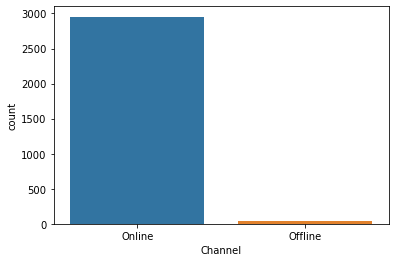

In [37]:
sns.countplot(data = data, x = 'Channel')

<AxesSubplot:xlabel='Product Name', ylabel='count'>

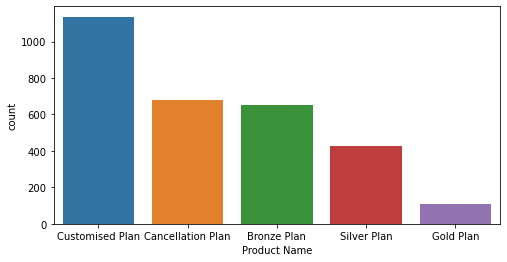

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(data = data, x = 'Product Name')

<AxesSubplot:xlabel='Destination', ylabel='count'>

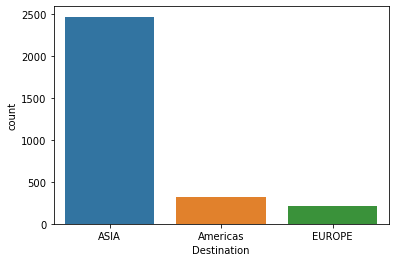

In [39]:
sns.countplot(data = data, x = 'Destination')

Mulvariate analysis for Continues variable

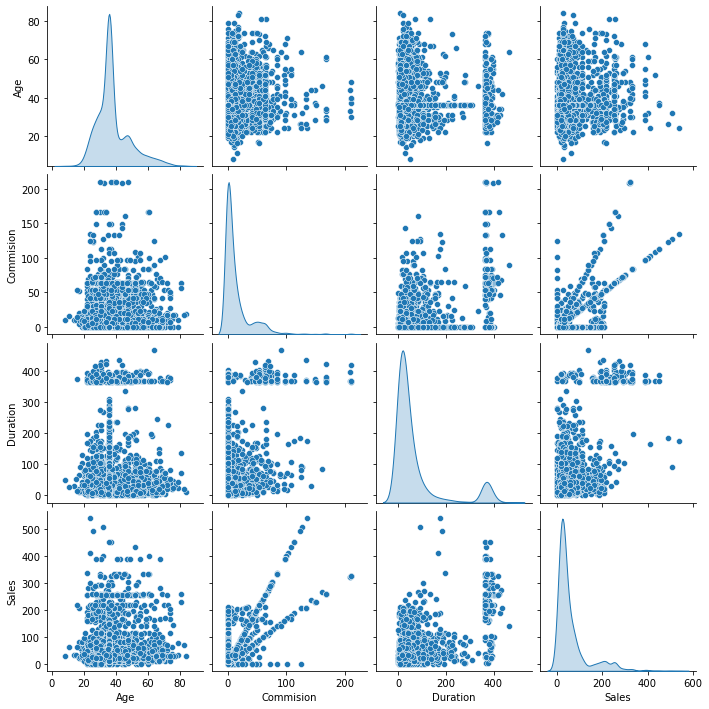

In [40]:
sns.pairplot(data,diag_kind='kde')

Heat map

In [41]:
corr1 = data.corr()
corr1

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.025079,0.039455
Commision,0.067717,1.000000,0.605422,0.766505
Duration,0.025079,0.605422,1.000000,0.720293
Sales,0.039455,0.766505,0.720293,1.000000


<AxesSubplot:>

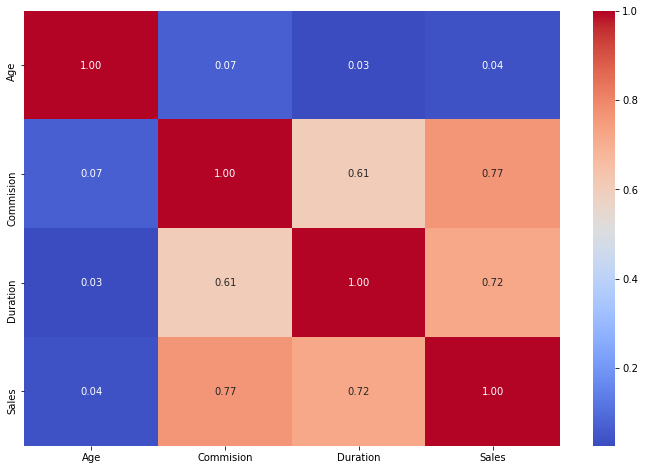

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(corr1, annot=True, fmt = '.2f', cmap='coolwarm')

Analysis between categorical  and  continuous data

<Figure size 1440x1080 with 0 Axes>

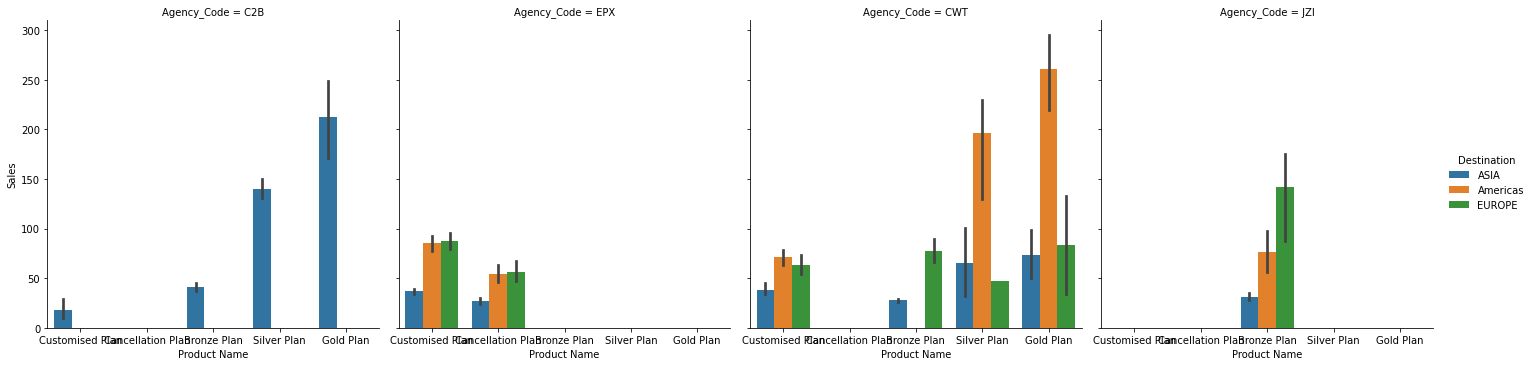

In [43]:
plt.figure(figsize=(20,15))
sns.catplot(x='Product Name',y='Sales',hue='Destination',col='Agency_Code',data=data,kind='bar')

<Figure size 1440x1080 with 0 Axes>

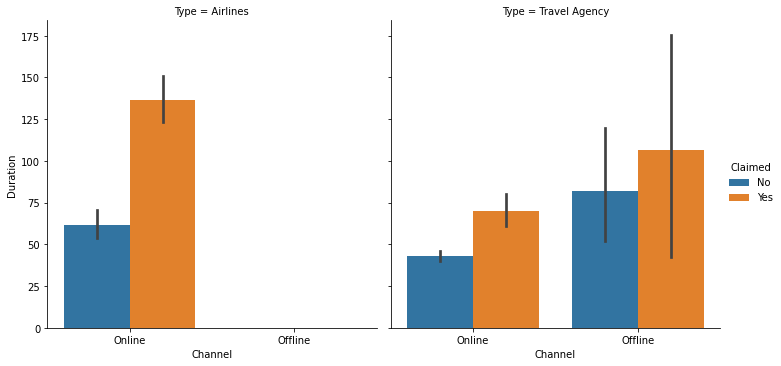

In [44]:
plt.figure(figsize=(20,15))
sns.catplot(x='Channel',y='Duration',hue='Claimed',col='Type',data=data,kind='bar')

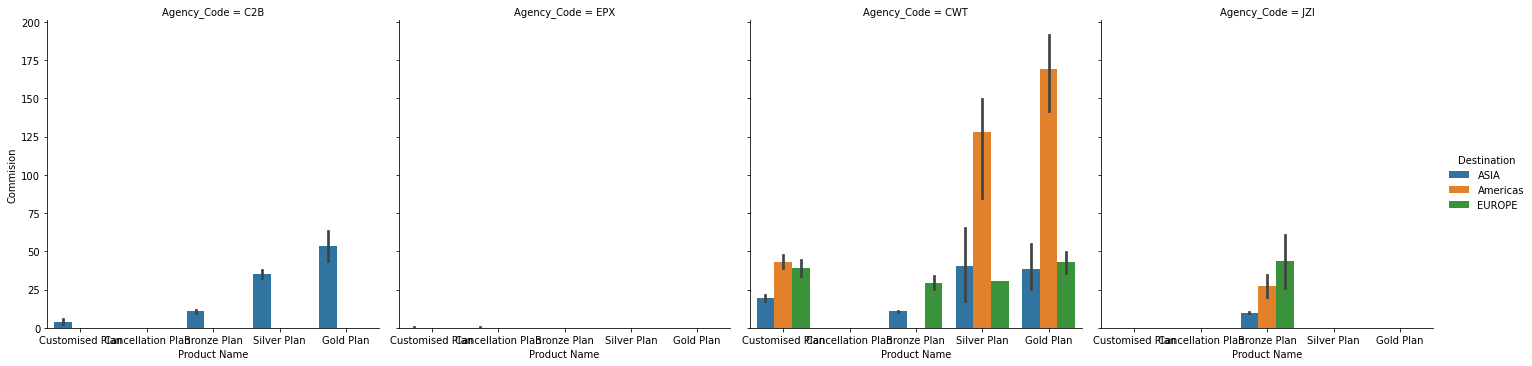

In [45]:
sns.catplot(x='Product Name',y='Commision',hue='Destination',col='Agency_Code',data=data,kind='bar')

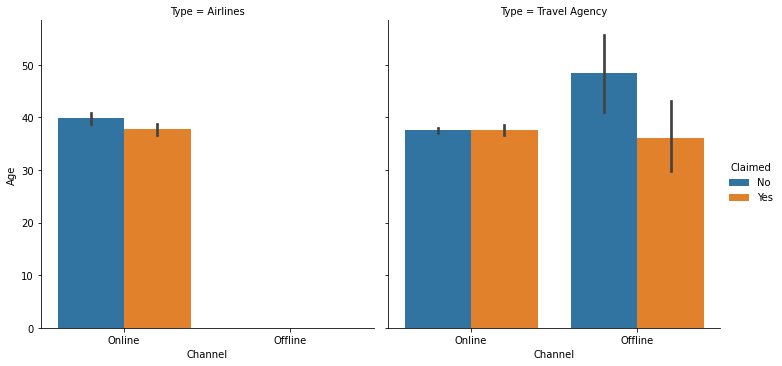

In [46]:
sns.catplot(x='Channel',y='Age',hue='Claimed',col='Type',data=data,kind='bar')

In [29]:
# Let's check the skewness values quantitatively
data.skew().sort_values(ascending=False)

Commision    3.148858
Sales        2.381148
Duration     2.238525
Age          1.149713
dtype: float64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


For building the model all the feature with object datatypes should be converted to categorical codes

In [31]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [32]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [33]:
data['Agency_Code'].value_counts()

2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64

Agency code

EPX  2

C2B  0

CWT  1

JZI  3

In [34]:
data['Type'].value_counts()

1    1837
0    1163
Name: Type, dtype: int64

Type

Travel  Agency 1

Airlines  0

In [35]:
data['Claimed'].value_counts()

0    2076
1     924
Name: Claimed, dtype: int64

Claimed

No    0

yes    1

In [36]:
data['Channel'].value_counts()

1    2954
0      46
Name: Channel, dtype: int64

Channnel

online  1

offline  0

In [37]:
data['Product Name'].value_counts()

2    1136
1     678
0     650
4     427
3     109
Name: Product Name, dtype: int64

Product name

Customised plan   2

cancellation plan  1

Bronze plan  0

silver  plan 4

gold plan  3

In [38]:
data['Destination'].value_counts()

0    2465
1     320
2     215
Name: Destination, dtype: int64

Destination

ASIA  0

Americas  1

EUROPE  2

Data encoding is also a part of EDA which is done above

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


The column claimed is the target variable


Looking at the propotion of that cloumn

In [40]:
data['Claimed'].value_counts(normalize=True) * 100

0    69.2
1    30.8
Name: Claimed, dtype: float64

69.2% not claimed

30.8% claimed

2.2 Data Split: Split the data into test and train(1 pts), build classification model CART (1.5 pts), Random Forest (1.5 pts), Artificial Neural Network(1.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Make classification reports for each model. Write inferences on each model (2 pts). Calculate Train and Test Accuracies for each model. Comment on the validness of models (overfitting or underfitting) Build confusion matrix for each model. Comment on the positive class in hand. Must clearly show obs/pred in row/col Plot roc_curve for each model. Calculate roc_auc_score for each model. Comment on the above calculated scores and plots. Build classification reports for each model. Comment on f1 score, precision and recall, which one is important here.

The below codes contains answers for both ques 2.2  and 2.3. So  use necessary code and insights for respective questions, and produce in report

In [41]:
#seperating the dependent and independent variable into two seperate data set
#x is the independent variables
#y is the dependent variable
x=data.drop('Claimed',axis=1)
y=data.pop('Claimed')

In [42]:
x.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [43]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8

In [44]:
#training data and testing data
xtrain,xtest,trainlabels,testlabels=train_test_split(x,y,test_size=.30,random_state=10)

In [45]:
print('xtrain',xtrain.shape)
print('xtest',xtest.shape)
print('trainlabels',trainlabels.shape)
print('testlabels',testlabels.shape)

xtrain (2100, 9)
xtest (900, 9)
trainlabels (2100,)
testlabels (900,)


In [46]:
#initially  building  the  model with  no  prunninng  parameters

Decision Tree Model and its Performance  metrics

In [72]:
dtc=DecisionTreeClassifier(criterion='gini')

In [73]:
dtc.fit(xtrain,trainlabels)

DecisionTreeClassifier()

In [74]:
#to  visualize the ablove decision tree
from sklearn  import tree

In [75]:
#creating the labels for  training data to visualize
train_char_label=['no','yes']

In [99]:
#to prepare graphical representation we should creat a dot file
dtc_tree_projectfile=open('E:\df_tree_projectfile.dot','w')

In [100]:
#to  create the  visulization graph in the given location
dot_data=tree.export_graphviz(dtc,out_file=dtc_tree_projectfile,feature_names=list(xtrain),class_names=list(train_char_label))

In [101]:
#to close the opened file
dtc_tree_projectfile.close()

In [81]:
#file in e drive and pdf stoted in desktop 

In [82]:
#so when we observe the above decision tree it is observed that the tree is over grown. As there is not pruning parameter given in the model.\
#hence the model is defined using purning and executed again

In [84]:
#pruning parameters so choosen by using grid search
#range function is used

In [88]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [5,6,7,14,15,16,25],
    'min_samples_leaf': [20,35,40,50,55,60,65,100,110,135,155], 
    'min_samples_split': [60,105,120,150,165,180,195,300,330,405,465]}
dtcl = DecisionTreeClassifier(random_state=1)
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 5)


In [89]:
grid_search_dtcl.fit(xtrain, trainlabels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini'],
                         'max_depth': [5, 6, 7, 14, 15, 16, 25],
                         'min_samples_leaf': [20, 35, 40, 50, 55, 60, 65, 100,
                                              110, 135, 155],
                         'min_samples_split': [60, 105, 120, 150, 165, 180, 195,
                                               300, 330, 405, 465]})

In [90]:
print(grid_search_dtcl.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 405}


In [91]:
grid_search_dtcl.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 405}

In [93]:
best_grid_dtcl = grid_search_dtcl.best_estimator_

In [94]:
best_grid_dtcl

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=405,
                       random_state=1)

Creating decision classifier tree

In [102]:
#to prepare graphical representation we should creat a dot file
dtc_tree_pruned_projectfile=open('E:\df_tree_pruned_projectfile.dot','w')

In [103]:
#to  create the  visulization graph in the given location
dot_data1=tree.export_graphviz(best_grid_dtcl,out_file=dtc_tree_pruned_projectfile,feature_names=list(xtrain),class_names=list(train_char_label))

In [104]:
#to close the opened file
dtc_tree_pruned_projectfile.close()

The pruned decision tree is visualised and image is saved

Feature importance for decision tree model

In [105]:
#To find the variables that are used in the split is found by below code(gini gain for each variables)
best_grid_dtcl.feature_importances_

array([0.        , 0.61860539, 0.        , 0.03508244, 0.        ,
       0.02205244, 0.22364284, 0.10061689, 0.        ])

In [106]:
#Putting the above array  into data frame
print(pd.DataFrame(best_grid_dtcl.feature_importances_,columns=['Importance'],index=xtrain.columns).sort_values('Importance',ascending=False))

              Importance
Agency_Code     0.618605
Sales           0.223643
Product Name    0.100617
Commision       0.035082
Duration        0.022052
Age             0.000000
Type            0.000000
Channel         0.000000
Destination     0.000000


Prediction on test data and train data

In [108]:
ytrain_predict_dectree = best_grid_dtcl.predict(xtrain)    #Train  data
ytrain_predict_dectree 

array([0, 1, 0, ..., 0, 0, 1], dtype=int8)

In [109]:
ytest_predict_dectree = best_grid_dtcl.predict(xtest)    #Test data
ytest_predict_dectree

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,

To find the probablity

In [111]:
ytrain_predict_prob_dectree=best_grid_dtcl.predict_proba(xtrain)   #prob of train data
ytrain_predict_prob_dectree

array([[0.86774194, 0.13225806],
       [0.37128713, 0.62871287],
       [0.57983193, 0.42016807],
       ...,
       [0.57983193, 0.42016807],
       [0.88372093, 0.11627907],
       [0.19333333, 0.80666667]])

In [110]:
ytest_predict_prob_dectree=best_grid_dtcl.predict_proba(xtest)   #prob of test data
ytest_predict_prob_dectree

array([[0.57983193, 0.42016807],
       [0.97864769, 0.02135231],
       [0.37128713, 0.62871287],
       ...,
       [0.57983193, 0.42016807],
       [0.97864769, 0.02135231],
       [0.86774194, 0.13225806]])

with  this Decision  tree model building is completed

Following are the Performance metrics of  decision tree model

Accuracy of train and test data 

In [112]:
best_grid_dtcl.score(xtrain,trainlabels)   #train  data

0.7766666666666666

In [113]:
best_grid_dtcl.score(xtest,testlabels)    #test data

0.8111111111111111

ROC curve and ROC_AUC score of train and test data

AUC: 0.815


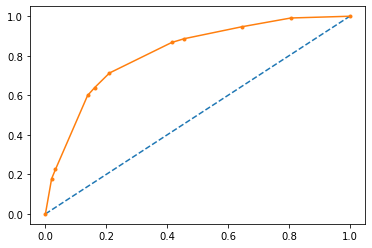

In [115]:
# AUC and ROC for the training data

# predict probabilities
probs = ytrain_predict_prob_dectree
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(trainlabels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(trainlabels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.808


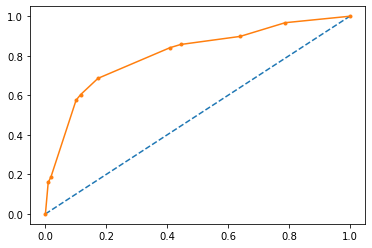

In [116]:
# AUC and ROC for the test data

# predict probabilities
probs = ytest_predict_prob_dectree
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(testlabels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testlabels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Confusion Matrix  for test and train data

In [122]:
confusion_matrix(trainlabels, ytrain_predict_dectree )        #training data

array([[1224,  197],
       [ 272,  407]], dtype=int64)

In [125]:
confusion_matrix(testlabels, ytest_predict_dectree )      #test data

array([[589,  66],
       [104, 141]], dtype=int64)

Classification report for test and train data

In [126]:
print(classification_report(trainlabels, ytrain_predict_dectree ))        #training data

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1421
           1       0.67      0.60      0.63       679

    accuracy                           0.78      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.77      0.78      0.77      2100



In [127]:
print(classification_report(testlabels, ytest_predict_dectree ))      #test data

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       655
           1       0.68      0.58      0.62       245

    accuracy                           0.81       900
   macro avg       0.77      0.74      0.75       900
weighted avg       0.80      0.81      0.81       900



So with this the decision tree and cart  model is built and the performance metrics is observed and insights are obtained

THE FOLLOWING ARE THE CODES FOR RANDOM FOREST MODEL

RANDOM FOREST

Initially the paramerter are choosen using grid search CV command

In [49]:
rfcl = RandomForestClassifier(random_state=1,oob_score=True)


In [52]:
param_grid_rfcl = {
    'max_depth': [5,6,20],
    'max_features': [3,6],
    'min_samples_leaf': [8,20,100],
    'min_samples_split': [45,405], 
    'n_estimators': [350,501] 
}

In [53]:
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 3)

In [54]:
grid_search_rfcl.fit(xtrain, trainlabels)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(oob_score=True, random_state=1),
             param_grid={'max_depth': [5, 6, 20], 'max_features': [3, 6],
                         'min_samples_leaf': [8, 20, 100],
                         'min_samples_split': [45, 405],
                         'n_estimators': [350, 501]})

In [55]:
print(grid_search_rfcl.best_params_)

{'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 8, 'min_samples_split': 45, 'n_estimators': 350}


In [56]:
grid_search_rfcl.best_params_

{'max_depth': 5,
 'max_features': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 45,
 'n_estimators': 350}

In [58]:
best_grid_rfcl = grid_search_rfcl.best_estimator_


In [59]:
best_grid_rfcl

RandomForestClassifier(max_depth=5, max_features=6, min_samples_leaf=8,
                       min_samples_split=45, n_estimators=350, oob_score=True,
                       random_state=1)

To find out of bag score 00b

In [76]:
best_grid_rfcl.oob_score_

0.7757142857142857

Feature importance for decision tree model

In [60]:
#To find the variables that are used in the split is found by below code(gini gain for each variables)
best_grid_rfcl.feature_importances_

array([0.02914294, 0.38850814, 0.01433397, 0.08836636, 0.00224033,
       0.05033363, 0.17361468, 0.24207936, 0.01138058])

In [61]:
#Putting the above array  into data frame
print(pd.DataFrame(best_grid_rfcl.feature_importances_,columns=['Importance'],index=xtrain.columns).sort_values('Importance',ascending=False))

              Importance
Agency_Code     0.388508
Product Name    0.242079
Sales           0.173615
Commision       0.088366
Duration        0.050334
Age             0.029143
Type            0.014334
Destination     0.011381
Channel         0.002240


Prediction on test data and train data

In [62]:
ytrain_predict_randfor = best_grid_rfcl.predict(xtrain)    #Train  data
ytrain_predict_randfor

array([0, 1, 0, ..., 0, 0, 1], dtype=int8)

In [63]:
ytest_predict_randfor = best_grid_rfcl.predict(xtest)    #Test data
ytest_predict_randfor

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,

To find the probablity

In [64]:
ytrain_predict_prob_randfor=best_grid_rfcl.predict_proba(xtrain)   #prob of train data
ytrain_predict_prob_randfor

array([[0.90473475, 0.09526525],
       [0.38076061, 0.61923939],
       [0.64797121, 0.35202879],
       ...,
       [0.66971192, 0.33028808],
       [0.93485776, 0.06514224],
       [0.22424732, 0.77575268]])

In [65]:
ytest_predict_prob_randfor=best_grid_rfcl.predict_proba(xtest)   #prob of test data
ytest_predict_prob_randfor

array([[0.58334682, 0.41665318],
       [0.9494708 , 0.0505292 ],
       [0.42389168, 0.57610832],
       ...,
       [0.64748996, 0.35251004],
       [0.96802067, 0.03197933],
       [0.92363865, 0.07636135]])

with this random forest model building is completed

Following are the Performance metrics of random forest model

Accuracy of train and test data

In [68]:
best_grid_rfcl.score(xtrain,trainlabels)   #train  data

0.7895238095238095

In [69]:
best_grid_rfcl.score(xtest,testlabels)    #test data

0.8088888888888889

ROC curve and ROC_AUC score of train and test data

AUC: 0.848


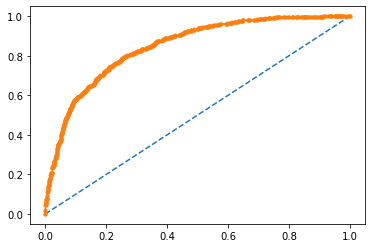

In [70]:
# AUC and ROC for the training data

# predict probabilities
probs = ytrain_predict_prob_randfor
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(trainlabels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(trainlabels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.826


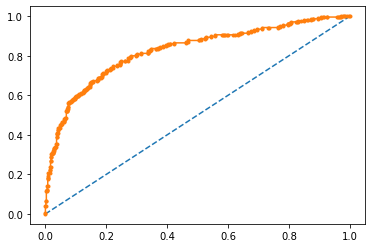

In [71]:
# AUC and ROC for the test data

# predict probabilities
probs = ytest_predict_prob_randfor
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(testlabels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testlabels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Confusion Matrix  for test and train data

In [72]:
confusion_matrix(trainlabels, ytrain_predict_randfor )        #training data

array([[1219,  202],
       [ 240,  439]], dtype=int64)

In [73]:
confusion_matrix(testlabels, ytest_predict_randfor )      #test data

array([[579,  76],
       [ 96, 149]], dtype=int64)

Classification report for test and train data

In [74]:
print(classification_report(trainlabels, ytrain_predict_randfor ))        #training data

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1421
           1       0.68      0.65      0.67       679

    accuracy                           0.79      2100
   macro avg       0.76      0.75      0.76      2100
weighted avg       0.79      0.79      0.79      2100



In [75]:
print(classification_report(testlabels, ytest_predict_randfor ))      #test data

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       655
           1       0.66      0.61      0.63       245

    accuracy                           0.81       900
   macro avg       0.76      0.75      0.75       900
weighted avg       0.80      0.81      0.81       900



So with this the random forest model is built and the performance metrics is observed and insights are obtained

THE FOLLOWING ARE THE CODES FOR artificial neural  network

ARTIFICIAL NEURAL NETWORK

As ANN model requires scaled data, initially scaling steps are done

In [77]:
#training data and testing data
xtrain,xtest,trainlabels,testlabels=train_test_split(x,y,test_size=.30,random_state=10)

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
sc=StandardScaler()   #storing it in a object

In [80]:
xtrains=sc.fit_transform(xtrain)    #preforming scaling in the train data. Do fit  and transform

In [81]:
xtrains

array([[-0.18983538,  0.73175433,  0.82136542, ..., -0.07995003,
        -0.54010958, -0.43902878],
       [ 2.87011611, -1.26653449, -1.21748491, ..., -0.47607747,
        -1.31911379, -0.43902878],
       [-1.52856416,  0.73175433,  0.82136542, ...,  1.4772406 ,
         0.23889462, -0.43902878],
       ...,
       [-0.18983538,  0.73175433,  0.82136542, ...,  0.32983698,
         0.23889462,  1.29397957],
       [-0.18983538,  0.73175433,  0.82136542, ..., -0.59901357,
        -0.54010958, -0.43902878],
       [ 1.91388127, -1.26653449, -1.21748491, ...,  2.10558068,
         1.79690303, -0.43902878]])

In [ ]:
#preforming scaling in the test data. Do not fit only use transform for test data

In [82]:
xtests=sc.transform(xtest)

In [83]:
xtests

array([[-0.47670584, -0.26739008,  0.82136542, ...,  1.18355991,
         0.23889462,  3.02698792],
       [-0.18983538,  0.73175433,  0.82136542, ..., -0.57169444,
         0.23889462, -0.43902878],
       [ 1.7226343 , -1.26653449, -1.21748491, ..., -0.59218379,
         1.79690303, -0.43902878],
       ...,
       [ 1.43576385,  0.73175433,  0.82136542, ...,  0.68498572,
         0.23889462,  1.29397957],
       [-0.18983538,  0.73175433,  0.82136542, ..., -0.69463054,
        -0.54010958, -0.43902878],
       [-0.18983538,  0.73175433,  0.82136542, ..., -0.47607747,
        -0.54010958, -0.43902878]])

So data is scaled

paramerter are choosen using grid search CV command

In [84]:
ann = MLPClassifier(verbose=True,random_state=1)


In [124]:
param_grid_ann = {
    'hidden_layer_sizes': [(100),(200)], 
    'activation': ['logistic', 'relu'],
    'max_iter': [1000,2500,8000], 
    'solver': ['adam','sgd'],
    'tol' : [0.1,0.01]  
}


In [125]:
grid_search_ann = GridSearchCV(estimator = ann, param_grid = param_grid_ann, cv = 5)

In [128]:
grid_search_ann.fit(xtrains, trainlabels)

Iteration 1, loss = 0.67290399
Iteration 2, loss = 0.62013238
Iteration 3, loss = 0.60116418
Iteration 4, loss = 0.59035874
Iteration 5, loss = 0.57891507
Iteration 6, loss = 0.56964036
Iteration 7, loss = 0.56125809
Iteration 8, loss = 0.55403889
Iteration 9, loss = 0.54788071
Iteration 10, loss = 0.54190609
Iteration 11, loss = 0.53725140
Iteration 12, loss = 0.53330198
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.67367534
Iteration 2, loss = 0.61837974
Iteration 3, loss = 0.60035817
Iteration 4, loss = 0.59023378
Iteration 5, loss = 0.57826734
Iteration 6, loss = 0.56882041
Iteration 7, loss = 0.56017201
Iteration 8, loss = 0.55239326
Iteration 9, loss = 0.54581059
Iteration 10, loss = 0.53979674
Iteration 11, loss = 0.53503096
Iteration 12, loss = 0.53045534
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.67351112
Iteration 2, loss = 0.61951441
Iteratio

Iteration 1, loss = 0.69510428
Iteration 2, loss = 0.66067212
Iteration 3, loss = 0.63743839
Iteration 4, loss = 0.63058608
Iteration 5, loss = 0.62869067
Iteration 6, loss = 0.62753523
Iteration 7, loss = 0.62666875
Iteration 8, loss = 0.62542301
Iteration 9, loss = 0.62433857
Iteration 10, loss = 0.62315653
Iteration 11, loss = 0.62214557
Iteration 12, loss = 0.62116613
Iteration 13, loss = 0.61998917
Iteration 14, loss = 0.61896356
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69466436
Iteration 2, loss = 0.66042937
Iteration 3, loss = 0.63711527
Iteration 4, loss = 0.63036230
Iteration 5, loss = 0.62822481
Iteration 6, loss = 0.62721917
Iteration 7, loss = 0.62634580
Iteration 8, loss = 0.62540145
Iteration 9, loss = 0.62437125
Iteration 10, loss = 0.62335744
Iteration 11, loss = 0.62240256
Iteration 12, loss = 0.62152451
Iteration 13, loss = 0.62052637
Iteration 14, loss = 0.61957651
Training loss did not improve mo

Iteration 1, loss = 0.69466436
Iteration 2, loss = 0.66042937
Iteration 3, loss = 0.63711527
Iteration 4, loss = 0.63036230
Iteration 5, loss = 0.62822481
Iteration 6, loss = 0.62721917
Iteration 7, loss = 0.62634580
Iteration 8, loss = 0.62540145
Iteration 9, loss = 0.62437125
Iteration 10, loss = 0.62335744
Iteration 11, loss = 0.62240256
Iteration 12, loss = 0.62152451
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69493333
Iteration 2, loss = 0.66073341
Iteration 3, loss = 0.63784082
Iteration 4, loss = 0.63085063
Iteration 5, loss = 0.62875992
Iteration 6, loss = 0.62769255
Iteration 7, loss = 0.62673298
Iteration 8, loss = 0.62571555
Iteration 9, loss = 0.62466590
Iteration 10, loss = 0.62369644
Iteration 11, loss = 0.62279253
Iteration 12, loss = 0.62177520
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69510243
Iteration 2, loss = 0.66123933
Iteratio

Iteration 15, loss = 0.52802165
Iteration 16, loss = 0.52585382
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69510243
Iteration 2, loss = 0.66123933
Iteration 3, loss = 0.63840280
Iteration 4, loss = 0.63097126
Iteration 5, loss = 0.62882138
Iteration 6, loss = 0.62764637
Iteration 7, loss = 0.62673677
Iteration 8, loss = 0.62564116
Iteration 9, loss = 0.62463433
Iteration 10, loss = 0.62343400
Iteration 11, loss = 0.62241044
Iteration 12, loss = 0.62150148
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69511598
Iteration 2, loss = 0.66000442
Iteration 3, loss = 0.63764728
Iteration 4, loss = 0.63019789
Iteration 5, loss = 0.62838096
Iteration 6, loss = 0.62726397
Iteration 7, loss = 0.62631887
Iteration 8, loss = 0.62514863
Iteration 9, loss = 0.62407927
Iteration 10, loss = 0.62283125
Iteration 11, loss = 0.62188148
Iteration 12, loss = 0.62078619
Traini

Iteration 14, loss = 0.51262181
Iteration 15, loss = 0.51156624
Iteration 16, loss = 0.50991704
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61904931
Iteration 2, loss = 0.59938048
Iteration 3, loss = 0.58395637
Iteration 4, loss = 0.56884470
Iteration 5, loss = 0.55749132
Iteration 6, loss = 0.54752907
Iteration 7, loss = 0.53897705
Iteration 8, loss = 0.53144884
Iteration 9, loss = 0.52698337
Iteration 10, loss = 0.52499244
Iteration 11, loss = 0.52339230
Iteration 12, loss = 0.51825438
Iteration 13, loss = 0.51738653
Iteration 14, loss = 0.51486955
Iteration 15, loss = 0.51289878
Iteration 16, loss = 0.51101302
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61905465
Iteration 2, loss = 0.60263938
Iteration 3, loss = 0.58757476
Iteration 4, loss = 0.57251672
Iteration 5, loss = 0.56257592
Iteration 6, loss = 0.55276663
Iteration 7, loss = 0.54557623
Iter

Iteration 8, loss = 0.53827097
Iteration 9, loss = 0.53375304
Iteration 10, loss = 0.52979603
Iteration 11, loss = 0.52766217
Iteration 12, loss = 0.52416575
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61946895
Iteration 2, loss = 0.60151171
Iteration 3, loss = 0.58687391
Iteration 4, loss = 0.57231753
Iteration 5, loss = 0.56241854
Iteration 6, loss = 0.55167431
Iteration 7, loss = 0.54485854
Iteration 8, loss = 0.53676979
Iteration 9, loss = 0.53149292
Iteration 10, loss = 0.52704011
Iteration 11, loss = 0.52476964
Iteration 12, loss = 0.52126936
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61896178
Iteration 2, loss = 0.60041365
Iteration 3, loss = 0.58434189
Iteration 4, loss = 0.57015231
Iteration 5, loss = 0.55803155
Iteration 6, loss = 0.54826900
Iteration 7, loss = 0.53858911
Iteration 8, loss = 0.53329922
Iteration 9, loss = 0.52801856
Iteratio

Iteration 5, loss = 0.55803155
Iteration 6, loss = 0.54826900
Iteration 7, loss = 0.53858911
Iteration 8, loss = 0.53329922
Iteration 9, loss = 0.52801856
Iteration 10, loss = 0.52510774
Iteration 11, loss = 0.52254569
Iteration 12, loss = 0.51879987
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61815383
Iteration 2, loss = 0.59861338
Iteration 3, loss = 0.58353572
Iteration 4, loss = 0.56901775
Iteration 5, loss = 0.55671316
Iteration 6, loss = 0.54713078
Iteration 7, loss = 0.53733472
Iteration 8, loss = 0.53053353
Iteration 9, loss = 0.52541678
Iteration 10, loss = 0.52328675
Iteration 11, loss = 0.52093728
Iteration 12, loss = 0.51590920
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61904931
Iteration 2, loss = 0.59938048
Iteration 3, loss = 0.58395637
Iteration 4, loss = 0.56884470
Iteration 5, loss = 0.55749132
Iteration 6, loss = 0.54752907
Iteratio

Iteration 5, loss = 0.62187050
Iteration 6, loss = 0.62085800
Iteration 7, loss = 0.62000048
Iteration 8, loss = 0.61906126
Iteration 9, loss = 0.61823858
Iteration 10, loss = 0.61767186
Iteration 11, loss = 0.61695276
Iteration 12, loss = 0.61578227
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62507488
Iteration 2, loss = 0.62457996
Iteration 3, loss = 0.62388326
Iteration 4, loss = 0.62312395
Iteration 5, loss = 0.62234627
Iteration 6, loss = 0.62158883
Iteration 7, loss = 0.62083715
Iteration 8, loss = 0.61991540
Iteration 9, loss = 0.61926071
Iteration 10, loss = 0.61837529
Iteration 11, loss = 0.61778825
Iteration 12, loss = 0.61684488
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62498290
Iteration 2, loss = 0.62444546
Iteration 3, loss = 0.62376922
Iteration 4, loss = 0.62297373
Iteration 5, loss = 0.62225320
Iteration 6, loss = 0.62145114
Iteratio

Iteration 10, loss = 0.59135838
Iteration 11, loss = 0.58361461
Iteration 12, loss = 0.57692522
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73786966
Iteration 2, loss = 0.71925738
Iteration 3, loss = 0.69598691
Iteration 4, loss = 0.67439875
Iteration 5, loss = 0.65506292
Iteration 6, loss = 0.63779805
Iteration 7, loss = 0.62376856
Iteration 8, loss = 0.61130586
Iteration 9, loss = 0.60059909
Iteration 10, loss = 0.59146886
Iteration 11, loss = 0.58332830
Iteration 12, loss = 0.57643090
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73713029
Iteration 2, loss = 0.71805731
Iteration 3, loss = 0.69404908
Iteration 4, loss = 0.67156244
Iteration 5, loss = 0.65178677
Iteration 6, loss = 0.63455763
Iteration 7, loss = 0.61995567
Iteration 8, loss = 0.60729008
Iteration 9, loss = 0.59657739
Iteration 10, loss = 0.58761137
Iteration 11, loss = 0.57976655
Iterat

Iteration 15, loss = 0.49232474
Iteration 16, loss = 0.49137767
Iteration 17, loss = 0.49028048
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70576499
Iteration 2, loss = 0.63499869
Iteration 3, loss = 0.58647348
Iteration 4, loss = 0.55737525
Iteration 5, loss = 0.53794568
Iteration 6, loss = 0.52493319
Iteration 7, loss = 0.51738364
Iteration 8, loss = 0.51230960
Iteration 9, loss = 0.50879217
Iteration 10, loss = 0.50674661
Iteration 11, loss = 0.50506143
Iteration 12, loss = 0.50420308
Iteration 13, loss = 0.50290045
Iteration 14, loss = 0.50205918
Iteration 15, loss = 0.50164366
Iteration 16, loss = 0.50070258
Iteration 17, loss = 0.49992124
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70781635
Iteration 2, loss = 0.63654255
Iteration 3, loss = 0.58714693
Iteration 4, loss = 0.55655567
Iteration 5, loss = 0.53638456
Iteration 6, loss = 0.52238515
Ite

Iteration 1, loss = 0.70538416
Iteration 2, loss = 0.63184696
Iteration 3, loss = 0.58271408
Iteration 4, loss = 0.55179776
Iteration 5, loss = 0.53202743
Iteration 6, loss = 0.51854112
Iteration 7, loss = 0.51042328
Iteration 8, loss = 0.50477534
Iteration 9, loss = 0.50101059
Iteration 10, loss = 0.49893288
Iteration 11, loss = 0.49660651
Iteration 12, loss = 0.49552225
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70576499
Iteration 2, loss = 0.63499869
Iteration 3, loss = 0.58647348
Iteration 4, loss = 0.55737525
Iteration 5, loss = 0.53794568
Iteration 6, loss = 0.52493319
Iteration 7, loss = 0.51738364
Iteration 8, loss = 0.51230960
Iteration 9, loss = 0.50879217
Iteration 10, loss = 0.50674661
Iteration 11, loss = 0.50506143
Iteration 12, loss = 0.50420308
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70781635
Iteration 2, loss = 0.63654255
Iteratio

Iteration 2, loss = 0.71730276
Iteration 3, loss = 0.69295552
Iteration 4, loss = 0.67030844
Iteration 5, loss = 0.65032270
Iteration 6, loss = 0.63282223
Iteration 7, loss = 0.61835498
Iteration 8, loss = 0.60548440
Iteration 9, loss = 0.59438807
Iteration 10, loss = 0.58532132
Iteration 11, loss = 0.57723602
Iteration 12, loss = 0.57035669
Iteration 13, loss = 0.56392041
Iteration 14, loss = 0.55866101
Iteration 15, loss = 0.55381465
Iteration 16, loss = 0.54950778
Iteration 17, loss = 0.54557455
Iteration 18, loss = 0.54220591
Iteration 19, loss = 0.53920112
Iteration 20, loss = 0.53629055
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73653462
Iteration 2, loss = 0.71797143
Iteration 3, loss = 0.69442955
Iteration 4, loss = 0.67293451
Iteration 5, loss = 0.65368797
Iteration 6, loss = 0.63685195
Iteration 7, loss = 0.62295061
Iteration 8, loss = 0.61075123
Iteration 9, loss = 0.60022542
Iteration 10, loss = 0.59135838

Iteration 10, loss = 0.56802322
Iteration 11, loss = 0.56287544
Iteration 12, loss = 0.55806721
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.64951879
Iteration 2, loss = 0.64108148
Iteration 3, loss = 0.63037140
Iteration 4, loss = 0.61946636
Iteration 5, loss = 0.60944342
Iteration 6, loss = 0.60054106
Iteration 7, loss = 0.59233741
Iteration 8, loss = 0.58527496
Iteration 9, loss = 0.57881238
Iteration 10, loss = 0.57308567
Iteration 11, loss = 0.56816393
Iteration 12, loss = 0.56353964
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.64927929
Iteration 2, loss = 0.64079556
Iteration 3, loss = 0.62988912
Iteration 4, loss = 0.61884800
Iteration 5, loss = 0.60882860
Iteration 6, loss = 0.59967035
Iteration 7, loss = 0.59143765
Iteration 8, loss = 0.58407853
Iteration 9, loss = 0.57748686
Iteration 10, loss = 0.57161609
Iteration 11, loss = 0.56659858
Iterat

Iteration 7, loss = 0.50618651
Iteration 8, loss = 0.50465607
Iteration 9, loss = 0.50356077
Iteration 10, loss = 0.50211212
Iteration 11, loss = 0.50121585
Iteration 12, loss = 0.50017536
Iteration 13, loss = 0.49915856
Iteration 14, loss = 0.49798404
Iteration 15, loss = 0.49710230
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61709392
Iteration 2, loss = 0.55955140
Iteration 3, loss = 0.53087223
Iteration 4, loss = 0.51673864
Iteration 5, loss = 0.50853016
Iteration 6, loss = 0.50381757
Iteration 7, loss = 0.50137950
Iteration 8, loss = 0.49942449
Iteration 9, loss = 0.49790250
Iteration 10, loss = 0.49655396
Iteration 11, loss = 0.49537448
Iteration 12, loss = 0.49423831
Iteration 13, loss = 0.49326314
Iteration 14, loss = 0.49190177
Iteration 15, loss = 0.49093649
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.64779162
Iteration 2, loss = 0.63892929
It

Iteration 10, loss = 0.49655396
Iteration 11, loss = 0.49537448
Iteration 12, loss = 0.49423831
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61399563
Iteration 2, loss = 0.55577872
Iteration 3, loss = 0.52830373
Iteration 4, loss = 0.51433492
Iteration 5, loss = 0.50772127
Iteration 6, loss = 0.50433766
Iteration 7, loss = 0.50138900
Iteration 8, loss = 0.50017281
Iteration 9, loss = 0.49825874
Iteration 10, loss = 0.49713073
Iteration 11, loss = 0.49623456
Iteration 12, loss = 0.49448345
Iteration 13, loss = 0.49330245
Iteration 14, loss = 0.49235496
Iteration 15, loss = 0.49165089
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61346805
Iteration 2, loss = 0.55347009
Iteration 3, loss = 0.52549510
Iteration 4, loss = 0.51136876
Iteration 5, loss = 0.50418283
Iteration 6, loss = 0.50091209
Iteration 7, loss = 0.49765591
Iteration 8, loss = 0.49614464
Itera

Iteration 1, loss = 0.69825068
Iteration 2, loss = 0.61602263
Iteration 3, loss = 0.56602535
Iteration 4, loss = 0.53807499
Iteration 5, loss = 0.52120520
Iteration 6, loss = 0.51163363
Iteration 7, loss = 0.50619134
Iteration 8, loss = 0.50333424
Iteration 9, loss = 0.50118342
Iteration 10, loss = 0.50033903
Iteration 11, loss = 0.49844428
Iteration 12, loss = 0.49750200
Iteration 13, loss = 0.49657393
Iteration 14, loss = 0.49560374
Iteration 15, loss = 0.49470483
Iteration 16, loss = 0.49365976
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1, verbose=True),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [100, 200],
                         'max_iter': [1000, 2500, 8000],
                         'solver': ['adam', 'sgd'], 'tol': [0.1, 0.01]})

In [129]:
grid_search_ann.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'max_iter': 1000,
 'solver': 'adam',
 'tol': 0.01}

In [130]:
best_grid_ann = grid_search_ann.best_estimator_

In [131]:
best_grid_ann 

MLPClassifier(hidden_layer_sizes=100, max_iter=1000, random_state=1, tol=0.01,
              verbose=True)

Prediction on test data and train data

In [134]:
ytrain_predict_ann = best_grid_ann.predict(xtrains)    #Train  data
ytrain_predict_ann

array([0, 0, 0, ..., 0, 0, 1], dtype=int8)

In [135]:
ytest_predict_ann = best_grid_ann.predict(xtests)    #Test data
ytest_predict_ann

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,

To find the probablity

In [138]:
ytrain_predict_prob_ann=best_grid_ann.predict_proba(xtrains)   #prob of train data
ytrain_predict_prob_ann

array([[0.900501  , 0.099499  ],
       [0.59432746, 0.40567254],
       [0.68560795, 0.31439205],
       ...,
       [0.70637613, 0.29362387],
       [0.92135135, 0.07864865],
       [0.22872111, 0.77127889]])

In [139]:
ytest_predict_prob_ann=best_grid_ann.predict_proba(xtests)   #prob of test data
ytest_predict_prob_ann

array([[0.55629354, 0.44370646],
       [0.89178228, 0.10821772],
       [0.45895264, 0.54104736],
       ...,
       [0.70648051, 0.29351949],
       [0.92939452, 0.07060548],
       [0.91484676, 0.08515324]])

with this ANN model building is completed

Following are the Performance metrics of ANN model

Accuracy of train and test data

In [140]:
best_grid_ann.score(xtrains,trainlabels)   #train  data

0.7576190476190476

In [141]:
best_grid_ann.score(xtests,testlabels)    #test data

0.8066666666666666

ROC curve and ROC_AUC score of train and test data

AUC: 0.808


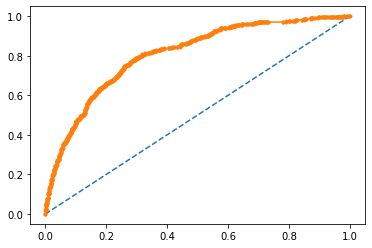

In [142]:
# AUC and ROC for the training data

# predict probabilities
probs = ytrain_predict_prob_ann
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(trainlabels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(trainlabels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.805


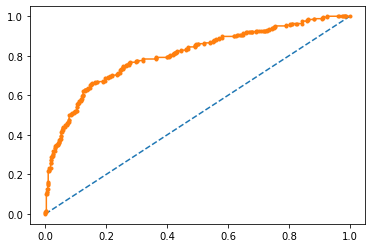

In [143]:
# AUC and ROC for the test data

# predict probabilities
probs = ytest_predict_prob_ann
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(testlabels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testlabels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Confusion Matrix for test and train data

In [144]:
confusion_matrix(trainlabels, ytrain_predict_ann )        #training data

array([[1261,  160],
       [ 349,  330]], dtype=int64)

In [145]:
confusion_matrix(testlabels, ytest_predict_ann )      #test data

array([[604,  51],
       [123, 122]], dtype=int64)

In [146]:
print(classification_report(trainlabels, ytrain_predict_ann ))        #training data

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1421
           1       0.67      0.49      0.56       679

    accuracy                           0.76      2100
   macro avg       0.73      0.69      0.70      2100
weighted avg       0.75      0.76      0.75      2100



In [147]:
print(classification_report(testlabels, ytest_predict_ann ))      #test data

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       655
           1       0.71      0.50      0.58       245

    accuracy                           0.81       900
   macro avg       0.77      0.71      0.73       900
weighted avg       0.80      0.81      0.80       900



So with this the ANN model is built and the performance metrics is observed and insights are obtained

# With this all three model builing and the performance metrics of all model is done. from this the insights are take and its in the report. Insights are takes comparing all the three model's performance metrics

2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (2.5 pts). Describe on which model is best/optimized (1.5 pts ). A table containing all the values of accuracies, precision, recall, auc_roc_score, f1 score. Comparison between the different models(final) on the basis of above table values. After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.

the comparison of different models should be mentioned and the best or the most optimized model on the test set should be mentioned.
Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. -> 5 points

The answer for 2.4 is in report. Comparasion of all model is done and the best model is choosen. Tabulation is prepared for explanation

2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific

Several recommendations and the business solutions are given as answer for the 2.5 question. Answer is in the report

In [1]:
import dtale
dtale.show(data)

ModuleNotFoundError: No module named 'dtale'